# Graph Generation

In [2]:
import os
import sys
import re 
import pandas as pd
import numpy as np

# 3D plotting utilities
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import proj3d
plt.style.use("fivethirtyeight")

## Modelling Configuration

In [3]:
# Model input signals, excite the response
signal_types = ["ramp", "step", "sine", "trueHeading"]
dataset_directory = './cutoffVariations/standard_dataset/'

## Raw

My old data set in the [old_data Github branch]() had multi-variate or errors within the file names, hence I needed to do some cleanup when generating my full DataFrame.

In [4]:
# Raw data that has been modelled
full_model_data_raw = pd.DataFrame([])
# Iterate for each column in the data, ie. all sensor model signals
for i in signal_types:
    for j in os.listdir(dataset_directory):
        if j.startswith(i) and j.endswith("Raw.csv"):
            # Select iteration cutoff frequency from file name (for clearly formatted filenames)
            iteration_cutoff_frequency_raw = j.replace(i, "").replace("Raw.csv", "").replace("_", ".")
            # Check if the string is more than two characters long
            if len(iteration_cutoff_frequency_raw) > 2:
                # Select inital two integers
                initial_integers = iteration_cutoff_frequency_raw[0] + iteration_cutoff_frequency_raw[1]
            # Check if unclean cutoffFrequency string starts with 0
            if ((iteration_cutoff_frequency_raw.startswith("0")) & (iteration_cutoff_frequency_raw.find(".") == -1)):
                iteration_cutoff_frequency = "0." + iteration_cutoff_frequency_raw[1:]
                pass
            # Add decimal point on number within the order of 10^2
            elif ((len(iteration_cutoff_frequency_raw) >= 3) & \
                  (iteration_cutoff_frequency_raw.find(".") == -1) & \
                  (not iteration_cutoff_frequency_raw.startswith("0"))
                 ):
                if (int(initial_integers) < 20):
                    iteration_cutoff_frequency = iteration_cutoff_frequency_raw[0:2] + "." + iteration_cutoff_frequency_raw[1:]
                else:
                    iteration_cutoff_frequency = iteration_cutoff_frequency_raw[0:1] + "." + iteration_cutoff_frequency_raw[1:]
            else:
                iteration_cutoff_frequency = iteration_cutoff_frequency_raw
            
            iteration_read_data_raw = pd.read_csv(dataset_directory + j)
            # Create cutoff frequency and input signalType columns accordingly
            iteration_read_data_raw.loc[:, 'cutoffFrequency'] = np.array([float(iteration_cutoff_frequency)] * len(iteration_read_data_raw))
            iteration_read_data_raw.loc[:, 'signalType'] = np.array([i] * len(iteration_read_data_raw))
            # Append into model
            full_model_data_raw = full_model_data_raw.append(iteration_read_data_raw, ignore_index=True)
full_model_data_raw

time  compassSystem  compassFilter  fullSystem  gyroFilter  \
0          0.000000   0.000000e+00   0.000000e+00    1.892572    1.892572   
1          0.000053   5.796526e-09   1.519264e-15   -0.386944   -0.386944   
2          0.000058   6.376690e-09   1.813048e-15   -0.219552   -0.219552   
3          0.000062   6.939904e-09   2.134257e-15    0.593092    0.593092   
4          0.000066   7.570454e-09   2.474066e-15   -1.026884   -1.026884   
5          0.000073   8.869616e-09   3.043871e-15    1.296390    1.296390   
6          0.000078   1.022732e-08   3.620595e-15   -0.363766   -0.363766   
7          0.000083   1.163499e-08   4.180161e-15    2.024766    2.024766   
8          0.000088   1.334166e-08   4.895321e-15    0.591293    0.591293   
9          0.000092   1.454164e-08   5.461104e-15    0.125578    0.125578   
10         0.000095   1.579166e-08   6.076786e-15    2.385815    2.385815   
11         0.000099   1.715236e-08   6.815568e-15    0.761561    0.761561   
12         0.000104   1.883614e-08   7.788001e-15    1.025498    1.025498   
13         0.000109   2.045903e-08   8.740079e-15    2.042577    2.042577   
14         0.000112   2.201795e-08   9.608736e-15   -0.624067   -0.624067   
15         0.000116   2.387706e-08   1.061087e-14   -0.879712   -0.879712   
16         0.000120   2.552410e-08   1.155529e-14    0.798264    0.798264   
17         0.000125   2.803492e-08   1.304082e-14    2.928731    2.928731   
18         0.000131   3.123328e-08   1.499851e-14    0.806703    0.806703   
19         0.000137   3.455182e-08   1.707866e-14    2.261406    2.261406   
20         0.000143   3.808155e-08   1.937887e-14    1.006164    1.006164   
21         0.000149   4.209609e-08   2.229025e-14    1.753759    1.753759   
22         0.000157   4.769604e-08   2.635590e-14    2.172598    2.172598   
23         0.000170   5.705039e-08   3.360501e-14   -0.152856   -0.152856   
24         0.000177   6.230640e-08   3.814176e-14    1.948051    1.948051   
25         0.000184   6.801891e-08   4.310139e-14    0.779345    0.779345   
26         0.000191   7.397124e-08   4.864456e-14    2.711763    2.711763   
27         0.000197   7.906722e-08   5.373930e-14    0.310765    0.310765   
28         0.000205   8.561267e-08   6.048922e-14    1.688178    1.688178   
29         0.000211   9.151560e-08   6.682405e-14    0.987330    0.987330   
...             ...            ...            ...         ...         ...   
1709346  338.900000  -5.035768e+01  -5.049993e+01  -49.820407    0.679521   
1709347  338.961840  -5.027021e+01  -5.041328e+01  -48.017569    2.395709   
1709348  339.000000  -5.021789e+01  -5.036039e+01  -50.131310    0.229076   
1709349  339.061723  -5.012624e+01  -5.027243e+01  -51.229300   -0.956869   
1709350  339.100000  -5.007521e+01  -5.021842e+01  -50.596184   -0.377763   
1709351  339.138067  -5.001867e+01  -5.016453e+01  -51.369872   -1.205339   
1709352  339.185020  -4.994103e+01  -5.009598e+01  -50.115302   -0.019319   
1709353  339.200000  -4.991533e+01  -5.007310e+01  -50.581525   -0.508421   
1709354  339.223929  -4.987547e+01  -5.003584e+01  -48.751845    1.283991   
1709355  339.261489  -4.981386e+01  -4.997629e+01  -50.003907   -0.027622   
1709356  339.300000  -4.976373e+01  -4.991682e+01  -50.049931   -0.133110   
1709357  339.346490  -4.970169e+01  -4.984899e+01  -49.774849    0.074139   
1709358  339.400000  -4.962768e+01  -4.977250e+01  -47.619276    2.153225   
1709359  339.458601  -4.954457e+01  -4.969000e+01  -50.452902   -0.762898   
1709360  339.500000  -4.948894e+01  -4.963130e+01  -49.740355   -0.109053   
1709361  339.549192  -4.944020e+01  -4.956591e+01  -48.499993    1.065919   
1709362  339.600000  -4.942276e+01  -4.951259e+01  -48.843892    0.668697   
1709363  339.674851  -4.942411e+01  -4.946397e+01  -48.500821    0.963149   
1709364  339.700000  -4.943936e+01  -4.945693e+01  -48.790040    0.666889   
1709365  339.747573  -4.947902e+01  -4.945787e+01  -50.948605   -1.490731   
1709366  33

In [5]:
# Cut down data size
true_heading_model_data_raw = full_model_data_raw[full_model_data_raw.signalType == "trueHeading"]
true_heading_model_data_raw = true_heading_model_data_raw[true_heading_model_data_raw.time.isin(np.arange(0, 340, 2))]
true_heading_model_data_raw

time  compassSystem  compassFilter  fullSystem  gyroFilter  \
0          0.0       0.000000       0.000000    1.892572    1.892572   
1620       2.0       0.779503       0.024547    1.826788    1.802241   
2137       4.0      13.651508       0.080813   20.608110   20.527296   
2233       6.0      55.006005       0.942878   57.267541   56.324663   
2316       8.0      99.517956       2.622295   98.332573   95.710278   
2431      10.0      96.550648       4.751808  101.975156   97.223348   
2479      12.0    -124.442859       4.924941 -101.198161 -106.123101   
2514      14.0     -78.430918       2.577850  -98.917807 -101.495656   
2561      16.0     -79.115907       0.197180  -98.903685  -99.100865   
2608      18.0     -95.647323      -1.978393  -89.018473  -87.040080   
2633      20.0     -84.772220      -3.601660  -70.566423  -66.964763   
2663      22.0     -53.752771      -4.798597  -37.834534  -33.035937   
2707      24.0     -47.413465      -5.788582  -39.869398  -34.080817   
2735      26.0     -46.662816      -6.765048  -55.005352  -48.240304   
2755      28.0     -49.618245      -7.709932  -47.089688  -39.379756   
2800      30.0     -50.653040      -8.625971  -57.201064  -48.575093   
2822      32.0     -49.869673      -9.524963  -61.135369  -51.610407   
2842      34.0     -50.093724     -10.404112  -37.130932  -26.726820   
2865      36.0     -50.946003     -11.264708  -40.485297  -29.220588   
2912      38.0     -48.015209     -12.102956  -59.548353  -47.445397   
2933      40.0     -47.956445     -12.933678  -58.630369  -45.696691   
2953      42.0     -51.726620     -13.754287  -41.096497  -27.342210   
2973      44.0     -39.971667     -14.559126  -44.048997  -29.489871   
2997      46.0     -78.071169     -15.488032  -54.101630  -38.613598   
3035      48.0    -149.570536     -16.500912 -100.014023  -83.513112   
3083      50.0     -81.464644     -18.318586 -100.295252  -81.976667   
3125      52.0     -67.058884     -20.291889  -58.779713  -38.487824   
3172      54.0     -27.943031     -20.857136  -30.508928   -9.651791   
3211      56.0     -44.382080     -21.197855  -46.176550  -24.978695   
3231      58.0     -31.125108     -21.679429  -30.076917   -8.397488   
...        ...            ...            ...         ...         ...   
1707435  280.0     -50.919540     -50.816222  -50.779078    0.037144   
1707508  282.0     -50.001906     -49.806098  -50.186805   -0.380707   
1707579  284.0     -49.442794     -49.387574  -49.287942    0.099633   
1707636  286.0     -49.629589     -49.801649  -50.399005   -0.597356   
1707711  288.0     -50.345010     -50.375597  -50.758288   -0.382690   
1707767  290.0     -49.982769     -49.796123  -48.873011    0.923113   
1707830  292.0     -49.962470     -49.931555  -49.004405    0.927150   
1707897  294.0     -49.954976     -49.997942  -48.510581    1.487360   
1707967  296.0     -49.661157     -49.710024  -50.181213   -0.471190   
1708037  298.0     -50.339656     -50.389137  -49.606499    0.782638   
1708099  300.0     -50.343180     -50.200677  -49.756708    0.443969   
1708163  302.0     -50.608240     -50.501167  -48.732541    1.768626   
1708226  304.0     -49.790973     -49.669745  -48.878670    0.791075   
1708302  306.0     -49.321740     -49.285950  -49.412758   -0.126808   
1708371  308.0     -50.031299     -50.105778  -49.952905    0.152873   
1708420  310.0     -50.085188     -50.100216  -52.159610   -2.059394   
1708498  312.0     -50.216407     -50.340520  -49.594463    0.746057   
1708559  314.0     -50.547092     -50.515560  -50.773092   -0.257532   
1708635  316.0     -50.196510     -50.076385  -50.493546   -0.417161   
1708699  318.0     -49.489293     -49.532943  -50.830958   -1.298015   
1708770  320.0     -49.898895     -49.865295  -51.165886   -1.300591   
1708824  322.0     -50.177728     -50.148150  -49.474969    0.673180   
1708891  324.0     -49.882651     -49.920063  -51.576107   -1.656044   
1708947  326.0     -49.447393     -49.495783  -50.

In [6]:
# Create multiIndex for all repeated cutoffFrequencies and input signalType
true_heading_model_raw_multiIndex = pd.MultiIndex.from_frame(true_heading_model_data_raw.loc[:, ["cutoffFrequency","signalType"]])
# Remove index columns from DataFrame
true_heading_model_data = true_heading_model_data_raw.loc[:, (true_heading_model_data_raw.columns != "cutoffFrequency") \
                                                       & (true_heading_model_data_raw.columns != "signalType")].set_index(true_heading_model_raw_multiIndex)
true_heading_model_data

time  compassSystem  compassFilter  fullSystem  \
cutoffFrequency signalType                                                     
0.010975        trueHeading    0.0       0.000000       0.000000    1.892572   
                trueHeading    2.0       0.779503       0.024547    1.826788   
                trueHeading    4.0      13.651508       0.080813   20.608110   
                trueHeading    6.0      55.006005       0.942878   57.267541   
                trueHeading    8.0      99.517956       2.622295   98.332573   
                trueHeading   10.0      96.550648       4.751808  101.975156   
                trueHeading   12.0    -124.442859       4.924941 -101.198161   
                trueHeading   14.0     -78.430918       2.577850  -98.917807   
                trueHeading   16.0     -79.115907       0.197180  -98.903685   
                trueHeading   18.0     -95.647323      -1.978393  -89.018473   
                trueHeading   20.0     -84.772220      -3.601660  -70.566423   
                trueHeading   22.0     -53.752771      -4.798597  -37.834534   
                trueHeading   24.0     -47.413465      -5.788582  -39.869398   
                trueHeading   26.0     -46.662816      -6.765048  -55.005352   
                trueHeading   28.0     -49.618245      -7.709932  -47.089688   
                trueHeading   30.0     -50.653040      -8.625971  -57.201064   
                trueHeading   32.0     -49.869673      -9.524963  -61.135369   
                trueHeading   34.0     -50.093724     -10.404112  -37.130932   
                trueHeading   36.0     -50.946003     -11.264708  -40.485297   
                trueHeading   38.0     -48.015209     -12.102956  -59.548353   
                trueHeading   40.0     -47.956445     -12.933678  -58.630369   
                trueHeading   42.0     -51.726620     -13.754287  -41.096497   
                trueHeading   44.0     -39.971667     -14.559126  -44.048997   
                trueHeading   46.0     -78.071169     -15.488032  -54.101630   
                trueHeading   48.0    -149.570536     -16.500912 -100.014023   
                trueHeading   50.0     -81.464644     -18.318586 -100.295252   
                trueHeading   52.0     -67.058884     -20.291889  -58.779713   
                trueHeading   54.0     -27.943031     -20.857136  -30.508928   
                trueHeading   56.0     -44.382080     -21.197855  -46.176550   
                trueHeading   58.0     -31.125108     -21.679429  -30.076917   
...                            ...            ...            ...         ...   
9.770100        trueHeading  280.0     -50.919540     -50.816222  -50.779078   
                trueHeading  282.0     -50.001906     -49.806098  -50.186805   
                trueHeading  284.0     -49.442794     -49.387574  -49.287942   
                trueHeading  286.0     -49.629589     -49.801649  -50.399005   
                trueHeading  288.0     -50.345010     -50.375597  -50.758288   
                trueHeading  290.0     -49.982769     -49.796123  -48.873011   
                trueHeading  292.0     -49.962470     -49.931555  -49.004405   
                trueHeading  294.0     -49.954976     -49.997942  -48.510581   
                trueHeading  296.0     -49.661157     -49.710024  -50.181213   
                trueHeading  298.0     -50.339656     -50.389137  -49.606499   
                trueHeading  300.0     -50.343180     -50.200677  -49.756708   
                trueHeading  302.0     -50.608240     -50.501167  -48.732541   
                trueHeading  304.0     -49.790973     -49.669745  -48.878670   
                trueHeading  306.0     -49.321740     -49.285950  -49.412758   
                trueHeading  308.0     -50.031299     -50.105778  -49.952905   
                trueHeading  310.0     -50.085188     -50.100216  -52.159610   
                trueHeading  312.0     -50.216407     -50.340520  -49.594463   
                trueHeading  3

**Time Response at 1.0476 rad**

In [7]:
ideal_time_response_dataset = full_model_data_raw[(full_model_data_raw.signalType == "trueHeading")\
                                                  & (full_model_data_raw.cutoffFrequency == 1.0476)]
ideal_time_response_dataset

time  compassSystem  compassFilter  fullSystem  gyroFilter  \
640708    0.000000   0.000000e+00   0.000000e+00    2.000003    2.000003   
640709    0.000005   1.714221e-10   3.007108e-16   -0.186285   -0.186285   
640710    0.000009   4.610021e-10   1.814754e-15    1.787490    1.787490   
640711    0.000013   6.568828e-10   4.016400e-15    1.241006    1.241006   
640712    0.000016   8.685806e-10   6.830130e-15    1.708820    1.708820   
640713    0.000020   1.281142e-09   1.046134e-14    0.916495    0.916495   
640714    0.000024   1.974861e-09   1.762466e-14    1.076867    1.076867   
640715    0.000028   2.736853e-09   2.847867e-14    1.390716    1.390716   
640716    0.000033   3.557960e-09   4.304999e-14    0.375124    0.375124   
640717    0.000039   5.101562e-09   7.138009e-14    0.834659    0.834659   
640718    0.000049   8.184631e-09   1.411112e-13    2.369495    2.369495   
640719    0.000056   1.045342e-08   2.121107e-13    0.994159    0.994159   
640720    0.000064   1.292352e-08   3.006784e-13   -0.193624   -0.193624   
640721    0.000075   1.790820e-08   4.755107e-13    3.322574    3.322574   
640722    0.000085   2.394808e-08   7.079131e-13    1.469231    1.469231   
640723    0.000096   3.114838e-08   1.019029e-12    2.917845    2.917845   
640724    0.000107   3.970376e-08   1.413944e-12    1.341006    1.341006   
640725    0.000116   4.770999e-08   1.841071e-12    1.714087    1.714087   
640726    0.000124   5.508610e-08   2.262146e-12    2.333966    2.333966   
640727    0.000132   6.297561e-08   2.746074e-12    0.729005    0.729005   
640728    0.000139   7.051431e-08   3.244033e-12    1.277899    1.277899   
640729    0.000145   7.738012e-08   3.720063e-12    0.635676    0.635676   
640730    0.000158   9.317951e-08   4.916539e-12    1.555726    1.555726   
640731    0.000170   1.074125e-07   6.109003e-12   -0.397794   -0.397794   
640732    0.000179   1.200741e-07   7.244069e-12    1.394166    1.394166   
640733    0.000186   1.294786e-07   8.144825e-12    1.569248    1.569248   
640734    0.000192   1.372361e-07   8.911563e-12   -0.767614   -0.767614   
640735    0.000197   1.454869e-07   9.724531e-12    0.430511    0.430511   
640736    0.000202   1.533587e-07   1.053798e-11    1.084395    1.084395   
640737    0.000208   1.614072e-07   1.140381e-11    1.176730    1.176730   
...            ...            ...            ...         ...         ...   
648716  338.945990  -5.047228e+01  -5.067101e+01  -49.510885    1.160120   
648717  339.000000  -5.043361e+01  -5.065909e+01  -49.923168    0.735925   
648718  339.061710  -5.035348e+01  -5.064261e+01  -48.796583    1.846028   
648719  339.100000  -5.029509e+01  -5.063011e+01  -50.610188    0.019921   
648720  339.145203  -5.021393e+01  -5.061273e+01  -50.180881    0.431850   
648721  339.200000  -5.011876e+01  -5.058782e+01  -49.847161    0.740661   
648722  339.270700  -4.997851e+01  -5.054936e+01  -50.489473    0.059887   
648723  339.300000  -4.991239e+01  -5.053112e+01  -51.895659   -1.364539   
648724  339.335701  -4.982507e+01  -5.050677e+01  -49.256921    1.249850   
648725  339.400000  -4.968705e+01  -5.045761e+01  -49.094645    1.362966   
648726  339.480071  -4.956700e+01  -5.039033e+01  -49.188757    1.201575   
648727  339.500000  -4.955187e+01  -5.037316e+01  -49.868375    0.504781   
648728  339.531411  -4.953349e+01  -5.034627e+01  -51.289687   -0.943421   
648729  339.581479  -4.951315e+01  -5.030418e+01  -50.481244   -0.177068   
648730  339.600000  -4.950739e+01  -5.028891e+01  -48.530824    1.758088   
648731  339.626701  -4.950218e+01  -5.026729e+01  -50.516339   -0.249047   
648732  339.657549  -4.949209e+01  -5.024277e+01  -49.264756    0.978018   
648733  339.694058  -4.949156e+01  -5.021457e+01  -49.880794    0.333780   
648734  339.700000  -4.949249e+01  -5.021009e+01  -49.970193    0.239896   
648735  339.710064  -4.949485e+01  -5.020257e+01  -49.983352    0.219223   
648736  339.727315  -4.950084e+01  -5.018995e+01  -50.917862  

In [8]:
pureSignalsColumns = ["compassSystem", "compassFilter", "fullSystem", "gyroFilter", "gyroSystem", "input"]
errorSignalsColumns = ["compassSystemError", "compassFilterError", "fullSystemError", "gyroSystemError", "gyroFilterError"]
figure_time_limit = 30

**Transient Response**

Heading Input Signal

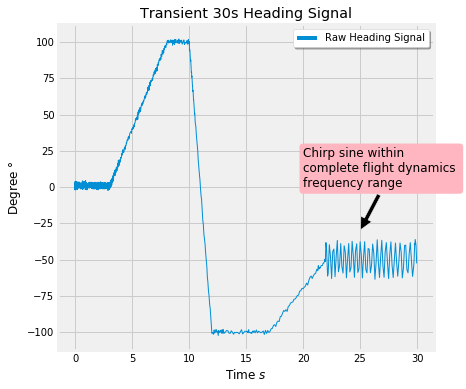

In [9]:
plt.figure(figsize=(6, 6))

# 30s
plt.plot(ideal_time_response_dataset.time[ideal_time_response_dataset.time < figure_time_limit],\
             ideal_time_response_dataset.loc[ideal_time_response_dataset.time < figure_time_limit, "input"],
             label="Raw Heading Signal",
             linewidth = 1)
plt.title(r'Transient ' + str(figure_time_limit) + r's Heading Signal')
plt.ylabel(r'Degree $\degree$')
plt.xlabel(r'Time $s$')
legend = plt.legend(shadow=True,\
           fancybox=True,\
           facecolor='white',\
           framealpha=1,\
           frameon=True)

# Increase width of legend lines
for legend_line in legend.get_lines():
    legend_line.set_linewidth(4.0)

plt.annotate("Chirp sine within \ncomplete flight dynamics \nfrequency range", \
            xy=(25, -30), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(20, 0),\
            fontsize=12,
            bbox=dict(boxstyle="round", fc="lightpink", ec="none"))

plt.savefig("./figures/headingSignal" + str(figure_time_limit) + "s.png", bbox_inches='tight')

All signals

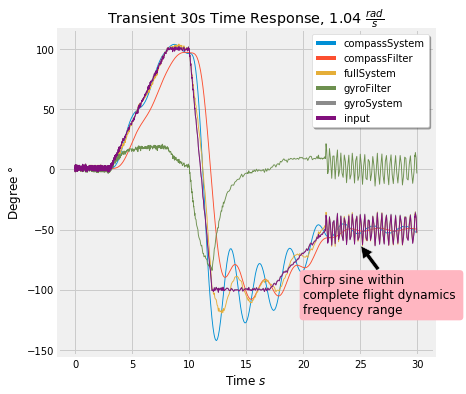

In [10]:
plt.figure(figsize=(6, 6))

# 30s
plt.plot(ideal_time_response_dataset.time[ideal_time_response_dataset.time < figure_time_limit],\
             ideal_time_response_dataset.loc[ideal_time_response_dataset.time < figure_time_limit, pureSignalsColumns],
             linewidth = 0.9)
plt.title(r'Transient ' + str(figure_time_limit) + r's Time Response, 1.04 $\frac{rad}{s}$')
plt.ylabel(r'Degree $\degree$')
plt.xlabel(r'Time $s$')
legend = plt.legend(pureSignalsColumns,
           shadow=True,\
           fancybox=True,\
           fontsize=10,
           facecolor='white',\
           framealpha=1,\
           frameon=True)

# Increase width of legend lines
for legend_line in legend.get_lines():
    legend_line.set_linewidth(4.0)

plt.annotate("Chirp sine within \ncomplete flight dynamics \nfrequency range", \
            xy=(25, -63), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(20, -120),\
            fontsize=12,
            bbox=dict(boxstyle="round", fc="lightpink", ec="none"))

plt.savefig("./figures/allSignalsTimeResponse" + str(figure_time_limit) + "s_1_0476.png", bbox_inches='tight')

Error Signals

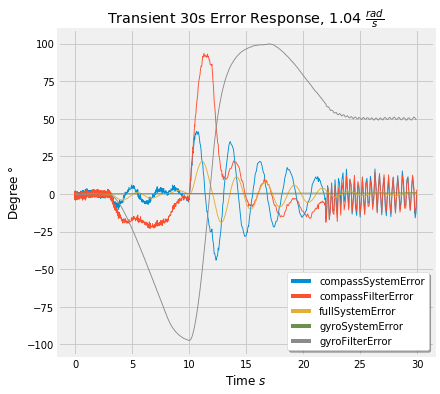

In [11]:
plt.figure(figsize=(6, 6))

plt.plot(ideal_time_response_dataset.time[ideal_time_response_dataset.time < figure_time_limit],\
             ideal_time_response_dataset.loc[ideal_time_response_dataset.time < figure_time_limit, errorSignalsColumns],
             linewidth = 0.9)
plt.title(r'Transient ' + str(figure_time_limit) + r's Error Response, 1.04 $\frac{rad}{s}$')
plt.ylabel(r'Degree $\degree$')
plt.xlabel(r'Time $s$')
legend = plt.legend(errorSignalsColumns,
           shadow=True,\
           fancybox=True,\
           facecolor='white',\
           framealpha=1,\
           fontsize=10,
           frameon=True)

# Increase width of legend lines
for legend_line in legend.get_lines():
    legend_line.set_linewidth(4.0)

plt.savefig("./figures/errorSignalsTimeResponse" + str(figure_time_limit) + "s_1_0476.png", bbox_inches='tight')

**Full Response**

Heading Signal

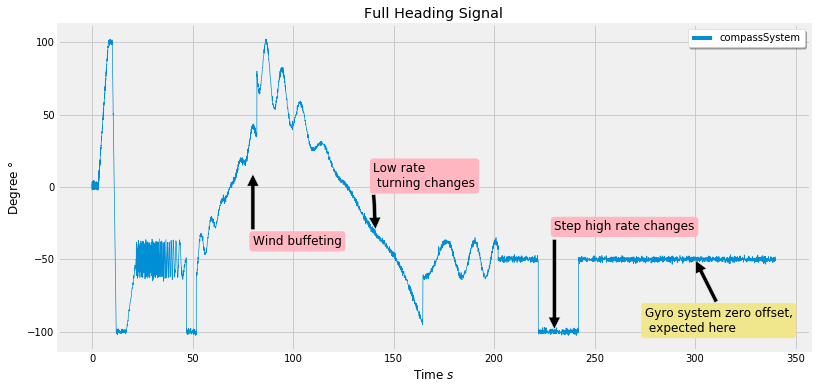

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(ideal_time_response_dataset.time,\
         ideal_time_response_dataset.loc[:, "input"],
         label="Raw Heading Signal",
         linewidth = 0.7)
plt.title(r'Full Heading Signal')
plt.ylabel(r'Degree $\degree$')
plt.xlabel(r'Time $s$')
legend = plt.legend(pureSignalsColumns,
           shadow=True,\
           fancybox=True,\
           facecolor='white',\
           framealpha=1,\
           frameon=True)

# Increase width of legend lines
for legend_line in legend.get_lines():
    legend_line.set_linewidth(4.0)

plt.annotate("Gyro system zero offset,\n expected here", \
            xy=(300, -50), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(275, -100),\
            fontsize=12,
            bbox=dict(boxstyle="round", fc="khaki", ec="none"))

plt.annotate("Step high rate changes", \
            xy=(230, -100), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(230, -30),\
            fontsize=12,
            bbox=dict(boxstyle="round", fc="lightpink", ec="none"))

plt.annotate("Low rate \n turning changes", \
            xy=(141, -30), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(140, 0),\
            fontsize=12,\
            bbox=dict(boxstyle="round", fc="lightpink", ec="none"))

plt.annotate("Wind buffeting", \
            xy=(80, 10), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(80, -40),\
            fontsize=12,\
            bbox=dict(boxstyle="round", fc="lightpink", ec="none"))

plt.savefig("./figures/fullHeadingSignal.png", bbox_inches='tight')

All raw signals

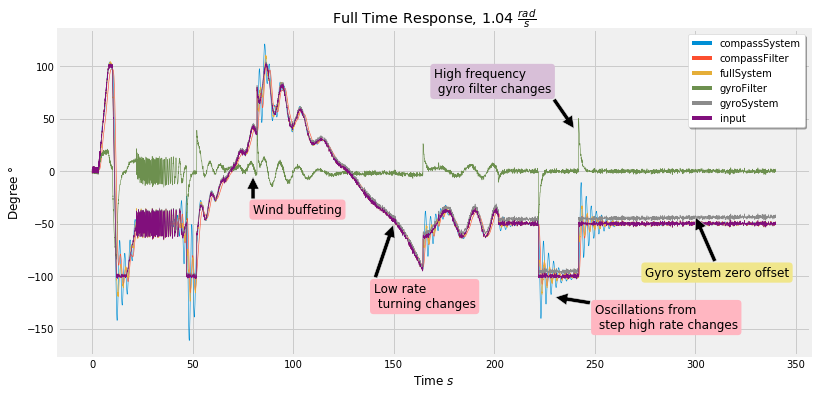

In [13]:
plt.figure(figsize=(12, 6))


plt.plot(ideal_time_response_dataset.time,\
         ideal_time_response_dataset.loc[:, pureSignalsColumns],
         linewidth = 0.6)
plt.title(r'Full Time Response, 1.04 $\frac{rad}{s}$')
plt.ylabel(r'Degree $\degree$')
plt.xlabel(r'Time $s$')
legend = plt.legend(pureSignalsColumns,
           shadow=True,\
           fancybox=True,\
           facecolor='white',\
           framealpha=1,\
           frameon=True)

# Increase width of legend lines
for legend_line in legend.get_lines():
    legend_line.set_linewidth(4.0)

plt.annotate("Gyro system zero offset", \
            xy=(300, -43), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(275, -100),\
            fontsize=12,
            bbox=dict(boxstyle="round", fc="khaki", ec="none"))

plt.annotate("High frequency \n gyro filter changes", \
            xy=(240, 40), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(170, 75),\
            fontsize=12,
            bbox=dict(boxstyle="round", fc="thistle", ec="none"))

plt.annotate("Oscillations from \n step high rate changes", \
            xy=(230, -120), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(250, -150),\
            fontsize=12,
            bbox=dict(boxstyle="round", fc="lightpink", ec="none"))

plt.annotate("Low rate \n turning changes", \
            xy=(150, -50), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(140, -130),\
            fontsize=12,
            bbox=dict(boxstyle="round", fc="lightpink", ec="none"))

plt.annotate("Wind buffeting", \
            xy=(80, -5), \
            arrowprops=dict(facecolor='black', shrink=0.025),\
            xytext=(80, -40),\
            fontsize=12,
            bbox=dict(boxstyle="round", fc="lightpink", ec="none"))

plt.savefig("./figures/allSignalsFullTimeResponse_1_0476.png", bbox_inches='tight')

In [43]:
ideal_time_response_dataset.loc[:, pureSignalsColumns].gyroSystem

640708     2.000003
640709    -0.186276
640710     1.787496
640711     1.241014
640712     1.708836
640713     0.916520
640714     1.076894
640715     1.390743
640716     0.375161
640717     0.834703
640718     2.369548
640719     0.994211
640720    -0.193559
640721     3.322664
640722     1.469330
640723     2.917973
640724     1.341148
640725     1.714238
640726     2.334133
640727     0.729182
640728     1.278085
640729     0.635866
640730     1.555926
640731    -0.397573
640732     1.394393
640733     1.569478
640734    -0.767367
640735     0.430762
640736     1.084651
640737     1.176991
            ...    
648716   -42.785365
648717   -43.124984
648718   -41.940961
648719   -43.717727
648720   -43.279677
648721   -42.929179
648722   -43.533659
648723   -44.898811
648724   -42.301066
648725   -42.246302
648726   -42.484661
648727   -43.196085
648728   -44.627649
648729   -43.838450
648730   -41.925263
648731   -43.870180
648732   -42.675876
648733   -43.322677
648734   -43.418388


In [44]:
50 -41.337832

8.662168000000001

Error signals

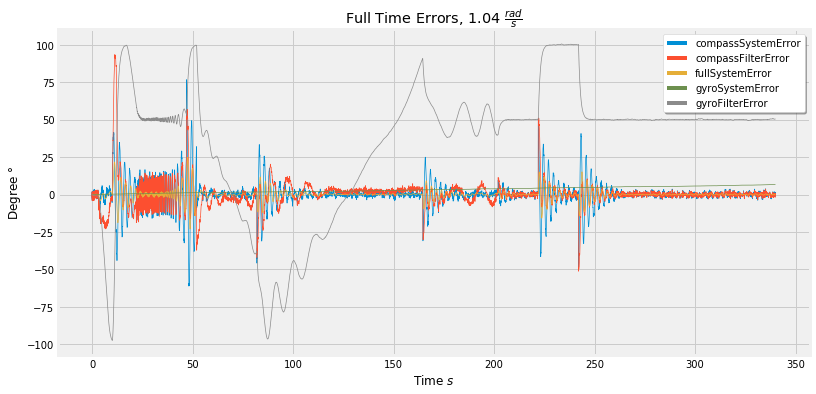

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(ideal_time_response_dataset.time,\
         ideal_time_response_dataset.loc[:, errorSignalsColumns],
         linewidth = 0.7)
plt.title(r'Full Time Errors, 1.04 $\frac{rad}{s}$')
plt.ylabel(r'Degree $\degree$')
plt.xlabel(r'Time $s$')
legend = plt.legend(errorSignalsColumns,
           shadow=True,\
           fancybox=True,\
           facecolor='white',\
           framealpha=1,\
           frameon=True)
for legend_line in legend.get_lines():
    legend_line.set_linewidth(4.0)

plt.savefig("./figures/errorSignalsFullTimeResponse_1_0476.png", bbox_inches='tight')

**Full System Response vs Cutoff Frequency**

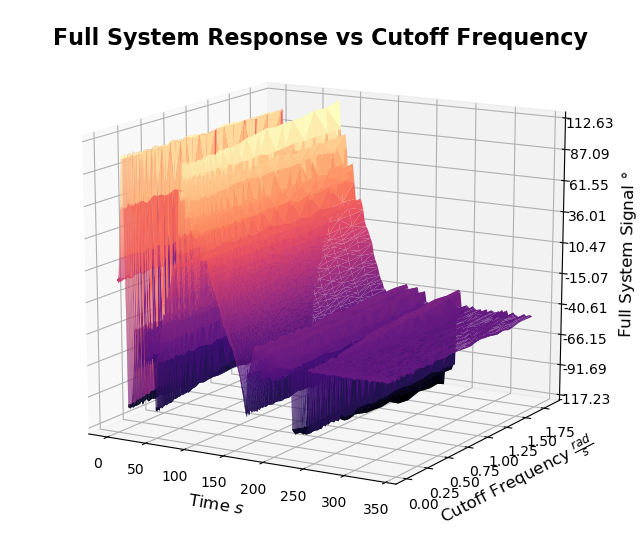

In [15]:
# Add into the figure
plt.style.use("default")
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection = '3d')

# Data into reference axis
X = true_heading_model_data_raw.time[true_heading_model_data_raw.cutoffFrequency < 2]
Y = true_heading_model_data_raw.cutoffFrequency[true_heading_model_data_raw.cutoffFrequency < 2]
Z = true_heading_model_data_raw.fullSystem[true_heading_model_data_raw.cutoffFrequency < 2]

# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.magma, edgecolor='none');

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Labelling
ax.set_title("Full System Response vs Cutoff Frequency", fontweight="bold", fontsize=16)
ax.set_xlabel(r"Time $s$", fontsize =12)#, fontweight="bold")
ax.set_ylabel(r"Cutoff Frequency $\frac{rad}{s}$", fontsize =12)#, fontweight="bold")
ax.set_zlabel(r"Full System Signal $\degree$", fontsize =12)#, fontweight="bold")

# Label padding
ax.yaxis.labelpad=5
ax.xaxis.labelpad=5
ax.zaxis.labelpad=10

ax.view_init(elev=15, azim=-60)

plt.savefig("./figures/fullSystemCutoffFrequency.png", bbox_inches='tight')

### Errors vs Cutoff Frequency

**Full System Error**

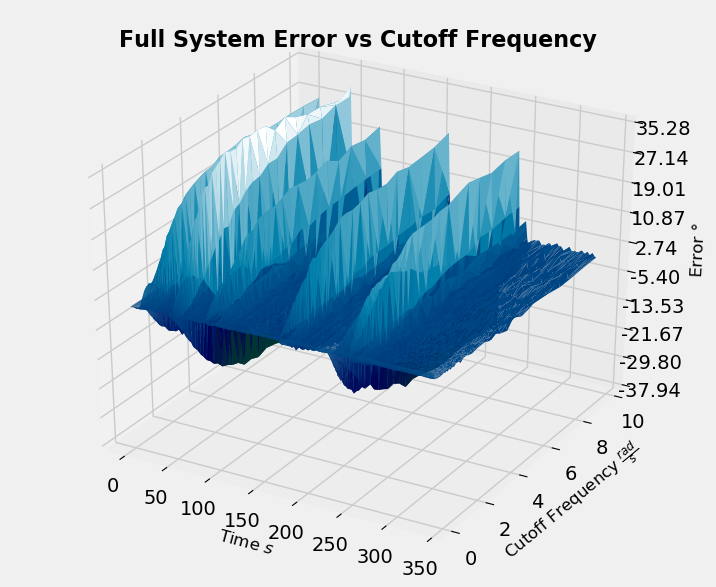

In [39]:
# Add into the figure
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection = '3d')

# Data into reference axis
X = true_heading_model_data_raw.time[true_heading_model_data_raw.cutoffFrequency < 10]
Y = true_heading_model_data_raw.cutoffFrequency[true_heading_model_data_raw.cutoffFrequency < 10]
Z = true_heading_model_data_raw.fullSystemError[true_heading_model_data_raw.cutoffFrequency < 10]


# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.ocean, edgecolor='none');

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Labelling
ax.set_title(r"Full System Error vs Cutoff Frequency", fontweight="bold", fontsize=16)
ax.set_xlabel(r"Time $s$", fontsize =12)#, fontweight="bold")
ax.set_ylabel(r"Cutoff Frequency $\frac{rad}{s}$", fontsize =12)#, fontweight="bold")
ax.set_zlabel(r"Error $\degree$", fontsize =12)#, fontweight="bold")

# Label padding
ax.yaxis.labelpad=5
ax.xaxis.labelpad=5
ax.zaxis.labelpad=10

# ax.view_init(elev=20, azim=-70)
plt.savefig("./figures/fullSystemErrorCutoffFrequency.png", bbox_inches='tight')

**Gyro Filter Error**

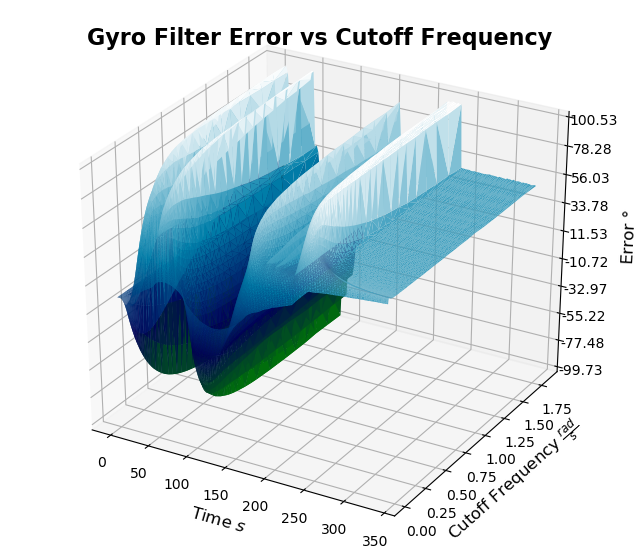

In [17]:
# Add into the figure
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection = '3d')

# Data into reference axis
X = true_heading_model_data_raw.time[true_heading_model_data_raw.cutoffFrequency < 2]
Y = true_heading_model_data_raw.cutoffFrequency[true_heading_model_data_raw.cutoffFrequency < 2]
Z = true_heading_model_data_raw.gyroFilterError[true_heading_model_data_raw.cutoffFrequency < 2]


# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.ocean, edgecolor='none');

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# labelling
ax.set_title("Gyro Filter Error vs Cutoff Frequency", fontweight="bold", fontsize=16)
ax.set_xlabel(r"Time $s$", fontsize =12)#, fontweight="bold")
ax.set_ylabel(r"Cutoff Frequency $\frac{rad}{s}$", fontsize =12)#, fontweight="bold")
ax.set_zlabel(r"Error $\degree$", fontsize =12)#, fontweight="bold")

# Label padding
ax.yaxis.labelpad=5
ax.xaxis.labelpad=5
ax.zaxis.labelpad=10

# ax.view_init(elev=20, azim=-70) # Not needed for this one

plt.savefig("./figures/gyroFilterErrorCutoffFrequency.png", bbox_inches='tight')

**Compass Filter Error**

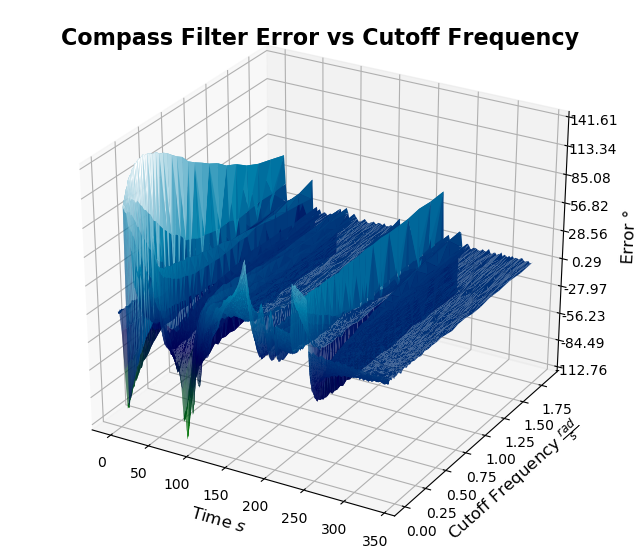

In [18]:
# Add into the figure
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection = '3d')

# Data into reference axis
X = true_heading_model_data_raw.time[true_heading_model_data_raw.cutoffFrequency < 2]
Y = true_heading_model_data_raw.cutoffFrequency[true_heading_model_data_raw.cutoffFrequency < 2]
Z = true_heading_model_data_raw.compassFilterError[true_heading_model_data_raw.cutoffFrequency < 2]


# Plot the surface.
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.ocean, edgecolor='none');

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# labelling
ax.set_title("Compass Filter Error vs Cutoff Frequency", fontweight="bold", fontsize=16)
ax.set_xlabel(r"Time $s$", fontsize =12)#, fontweight="bold")
ax.set_ylabel(r"Cutoff Frequency $\frac{rad}{s}$", fontsize =12)#, fontweight="bold")
ax.set_zlabel(r"Error $\degree$", fontsize =12)#, fontweight="bold")

# Label padding
ax.yaxis.labelpad=5
ax.xaxis.labelpad=5
ax.zaxis.labelpad=10

# ax.view_init(elev=20, azim=-70) # Not needed for this one

plt.savefig("./figures/compassFilterErrorCutoffFrequency.png", bbox_inches='tight')

## Analytics

In [19]:
plt.style.use("fivethirtyeight")
analytics_dataset_directory = './cutoffVariations/analytics_dataset/'

Note that if we want to model how the system error changes per 

In [20]:
full_model_data_analytics_raw = pd.DataFrame([])
error_data_analytics_raw = pd.DataFrame([])
for i in signal_types:
    # List all the corresponding files
    for j in os.listdir(analytics_dataset_directory):
        if j.startswith(i) and j.endswith("Analytics.csv"):
            # Select iteration cutoff frequency from file name
            iteration_cutoff_frequency = j.replace(i, "").replace("Analytics.csv", "").replace("_", ".")
            # Iteration dataset
            iteration_read_data = pd.read_csv(analytics_dataset_directory + j)
            # Create cutoff frequency and input signalType columns accordingly
            iteration_read_data.loc[:, 'cutoffFrequency'] = np.array([iteration_cutoff_frequency] * len(iteration_read_data)).astype("float64")
            iteration_read_data.loc[:, 'signalType'] = np.array([i] * len(iteration_read_data))
            # Append into model
            full_model_data_analytics_raw = full_model_data_analytics_raw.append(iteration_read_data, ignore_index=True)
full_model_data_analytics_raw

signalsNamesOrdered  maxSignals  minSignals  meanSignals  \
0          compassSystem  121.015355 -162.448089   -22.768459   
1          compassFilter    5.916751  -46.636951   -14.471692   
2             fullSystem  103.482900 -101.717336   -21.729022   
3             gyroFilter  114.146707 -104.986243    -7.257330   
4             gyroSystem  104.116825 -101.644710   -20.400363   
5                  input  103.270350 -102.981927   -22.720573   
6     compassSystemError   76.931620  -61.730529    -0.047886   
7     compassFilterError  105.483644 -113.074678     8.248881   
8        fullSystemError    2.053407    0.000000     0.991551   
9        gyroSystemError    6.725845    0.000000     2.320210   
10       gyroFilterError   48.682264   -4.818373    15.463243   
11         compassSystem  123.004360 -163.249392   -22.177456   
12         compassFilter    6.027692  -46.720933   -14.584656   
13            fullSystem  103.378101 -102.196495   -21.055510   
14            gyroFilter  113.635951 -105.727180    -6.470854   
15            gyroSystem  104.055451 -102.119965   -19.709490   
16                 input  102.352685 -102.797228   -22.040741   
17    compassSystemError   79.365009  -64.470018    -0.136715   
18    compassFilterError  106.056618 -112.550003     7.456085   
19       fullSystemError    2.031206    0.000000     0.985231   
20       gyroSystemError    6.725845    0.000000     2.331251   
21       gyroFilterError   48.749815   -4.938682    15.569887   
22         compassSystem  120.682449 -161.987374   -22.648824   
23         compassFilter    6.124510  -46.849586   -15.009401   
24            fullSystem  103.615149 -101.677596   -21.718727   
25            gyroFilter  114.150241 -106.209581    -6.709325   
26            gyroSystem  104.253642 -101.853929   -20.350253   
27                 input  102.597563 -102.636223   -22.697406   
28    compassSystemError   77.368795  -62.919488     0.048582   
29    compassFilterError  106.713650 -113.069088     7.688005   
...                  ...         ...         ...          ...   
9265          gyroFilter   49.690053  -49.218689     0.081193   
9266          gyroSystem  103.929815 -102.684825   -21.191808   
9267               input  102.713384 -103.061994   -23.532597   
9268  compassSystemError   77.969306  -64.142215    -0.145528   
9269  compassFilterError   77.102947  -61.915696    -0.138054   
9270     fullSystemError   66.621303  -61.383307    -0.056861   
9271     gyroSystemError    6.725845    0.000000     2.340789   
9272     gyroFilterError  101.140985 -101.585735    23.613791   
9273       compassSystem  120.883565 -162.620738   -23.229192   
9274       compassFilter  120.098153 -160.639429   -23.285723   
9275          fullSystem  122.844407 -163.221248   -23.220594   
9276          gyroFilter   49.798546  -49.279162     0.065129   
9277          gyroSystem  104.014790 -103.250214   -20.890282   
9278               input  102.793673 -103.590601   -23.188263   
9279  compassSystemError   78.130470  -63.620102    -0.040929   
9280  compassFilterError   77.638084  -61.843066    -0.097460   
9281     fullSystemError   66.466783  -60.153802    -0.032331   
9282     gyroSystemError    6.725845    0.000000     2.297981   
9283     gyroFilterError  101.265568 -101.873963    23.253392   
9284       compassSystem  120.047222 -162.783527   -22.845736   
9285       compassFilter  119.316714 -160.859688   -22.834412   
9286          fullSystem  120.768003 -161.575253   -22.724877   
9287          gyroFilter   49.558660  -51.619770     0.109535   
9288          gyroSystem  104.018971 -102.271349   -20.380284   
9289               input  102.309328 -102.615595   -22.687227   
9290  compassSystemError   78.624136  -64.064263    -0.158508   
9291  compassFilterError   77.833939  -62.718765    -0.147185   
9292     fullSystemError   66.011550  -60.404292    -0.037650   
9293     gyroSystemError    6.725845    0.000000     2.306944   
9294     gyroFilterError  101.728862 -10

In [21]:
# Create multiIndex for all model signals signalsNamesOrdered and input signalType
full_model_analytics_multiIndex = pd.MultiIndex.from_frame(full_model_data_analytics_raw.loc[:, ["signalsNamesOrdered","signalType"]])
# Remove index columns from DataFrame
full_model_analytics_data = full_model_data_analytics_raw.loc[:, (full_model_data_analytics_raw.columns != "signalsNamesOrdered") \
                                                       & (full_model_data_analytics_raw.columns != "signalType")].set_index(full_model_analytics_multiIndex)
full_model_analytics_data

maxSignals  minSignals  meanSignals  \
signalsNamesOrdered signalType                                         
compassSystem       trueHeading  121.015355 -162.448089   -22.768459   
compassFilter       trueHeading    5.916751  -46.636951   -14.471692   
fullSystem          trueHeading  103.482900 -101.717336   -21.729022   
gyroFilter          trueHeading  114.146707 -104.986243    -7.257330   
gyroSystem          trueHeading  104.116825 -101.644710   -20.400363   
input               trueHeading  103.270350 -102.981927   -22.720573   
compassSystemError  trueHeading   76.931620  -61.730529    -0.047886   
compassFilterError  trueHeading  105.483644 -113.074678     8.248881   
fullSystemError     trueHeading    2.053407    0.000000     0.991551   
gyroSystemError     trueHeading    6.725845    0.000000     2.320210   
gyroFilterError     trueHeading   48.682264   -4.818373    15.463243   
compassSystem       trueHeading  123.004360 -163.249392   -22.177456   
compassFilter       trueHeading    6.027692  -46.720933   -14.584656   
fullSystem          trueHeading  103.378101 -102.196495   -21.055510   
gyroFilter          trueHeading  113.635951 -105.727180    -6.470854   
gyroSystem          trueHeading  104.055451 -102.119965   -19.709490   
input               trueHeading  102.352685 -102.797228   -22.040741   
compassSystemError  trueHeading   79.365009  -64.470018    -0.136715   
compassFilterError  trueHeading  106.056618 -112.550003     7.456085   
fullSystemError     trueHeading    2.031206    0.000000     0.985231   
gyroSystemError     trueHeading    6.725845    0.000000     2.331251   
gyroFilterError     trueHeading   48.749815   -4.938682    15.569887   
compassSystem       trueHeading  120.682449 -161.987374   -22.648824   
compassFilter       trueHeading    6.124510  -46.849586   -15.009401   
fullSystem          trueHeading  103.615149 -101.677596   -21.718727   
gyroFilter          trueHeading  114.150241 -106.209581    -6.709325   
gyroSystem          trueHeading  104.253642 -101.853929   -20.350253   
input               trueHeading  102.597563 -102.636223   -22.697406   
compassSystemError  trueHeading   77.368795  -62.919488     0.048582   
compassFilterError  trueHeading  106.713650 -113.069088     7.688005   
...                                     ...         ...          ...   
gyroFilter          trueHeading   49.690053  -49.218689     0.081193   
gyroSystem          trueHeading  103.929815 -102.684825   -21.191808   
input               trueHeading  102.713384 -103.061994   -23.532597   
compassSystemError  trueHeading   77.969306  -64.142215    -0.145528   
compassFilterError  trueHeading   77.102947  -61.915696    -0.138054   
fullSystemError     trueHeading   66.621303  -61.383307    -0.056861   
gyroSystemError     trueHeading    6.725845    0.000000     2.340789   
gyroFilterError     trueHeading  101.140985 -101.585735    23.613791   
compassSystem       trueHeading  120.883565 -162.620738   -23.229192   
compassFilter       trueHeading  120.098153 -160.639429   -23.285723   
fullSystem          trueHeading  122.844407 -163.221248   -23.220594   
gyroFilter          trueHeading   49.798546  -49.279162     0.065129   
gyroSystem          trueHeading  104.014790 -103.250214   -20.890282   
input               trueHeading  102.793673 -103.590601   -23.188263   
compassSystemError  trueHeading   78.130470  -63.620102    -0.040929   
compassFilterError  trueHeading   77.638084  -61.843066    -0.097460   
fullSystemError     trueHeading   66.466783  -60.153802    -0.032331   
gyroSystemError     trueHeading    6.725845    0.000000     2.297981   
gyroFilterError     trueHeading  101.265568 -101.873963    23.253392   
compassSystem       trueHeading  120.047222 -162.783527   -22.845736   
compassFilter       trueHeading  119.316714 -160.859688   -22.834412   
fullSystem          trueHeading  120.768003 -161.575253   -22.724877   
gyroFilter          trueHeading   49.558660  -51.619770     0.109535   
g

In [22]:
signal = "trueHeading"
model_signal_data = pd.DataFrame({})
error_signals_analytic_data = pd.DataFrame({})
# Select all analytic metrics except cutoffFrequency
for analytic_metric in full_model_analytics_data.columns[full_model_analytics_data.columns != "cutoffFrequency"]:
    if analytic_metric.find("Correlation") == -1: # Not selecting rows that do not contain correlations
        for model_signal in full_model_analytics_data.index.levels[0]: # model signals signalsNamesOrdered list
            if model_signal.find("Error") == -1:
                # Index per model signals signalsNamesOrdered for only for one input signalType
                model_signal_data = model_signal_data.append(\
                                                             full_model_analytics_data.loc\
                                                             [pd.IndexSlice[model_signal,\
                                                                            signal], :])
                # Surely there must be a more memory efficient way of doing this
            elif model_signal.find("Error") != -1:
                error_signals_analytic_data = error_signals_analytic_data.append(\
                                                                       full_model_analytics_data.loc\
                                                                       [pd.IndexSlice[model_signal,\
                                                                                      signal], :])

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [23]:
model_signal_data

maxSignals  minSignals  meanSignals  \
signalsNamesOrdered signalType                                         
compassFilter       trueHeading    5.916751  -46.636951   -14.471692   
                    trueHeading    6.027692  -46.720933   -14.584656   
                    trueHeading    6.124510  -46.849586   -15.009401   
                    trueHeading    6.220800  -46.981247   -15.107373   
                    trueHeading    6.332029  -47.110738   -14.987266   
                    trueHeading    6.453480  -47.165879   -14.777776   
                    trueHeading    6.554065  -47.305468   -15.331177   
                    trueHeading    6.613871  -47.397346   -16.124103   
                    trueHeading    6.725058  -47.501764   -15.438323   
                    trueHeading    6.839280  -47.592652   -14.940708   
                    trueHeading    6.841757  -47.623990   -16.183743   
                    trueHeading    6.970551  -47.719721   -15.349816   
                    trueHeading    7.079467  -47.831411   -15.814884   
                    trueHeading    7.210183  -47.932617   -15.597573   
                    trueHeading    7.306421  -48.035815   -15.782532   
                    trueHeading    7.403077  -48.131850   -15.675605   
                    trueHeading    7.538726  -48.245457   -16.135320   
                    trueHeading    7.635241  -48.333413   -15.652009   
                    trueHeading    7.773142  -48.425294   -16.054306   
                    trueHeading    7.943142  -48.526725   -15.805973   
                    trueHeading    8.007626  -48.652478   -16.154099   
                    trueHeading    8.054552  -48.643990   -17.098437   
                    trueHeading    8.146470  -48.738053   -16.459469   
                    trueHeading    8.281321  -48.794127   -16.752778   
                    trueHeading    8.377834  -48.913293   -15.875280   
                    trueHeading    8.521167  -48.970175   -16.451281   
                    trueHeading    8.655317  -49.022635   -16.766742   
                    trueHeading    8.741640  -49.175129   -15.995609   
                    trueHeading    8.898283  -49.212181   -16.756839   
                    trueHeading    9.027764  -49.323277   -16.426062   
...                                     ...         ...          ...   
input               trueHeading  103.847657 -103.135905   -23.709362   
                    trueHeading  103.031527 -103.924704   -20.301309   
                    trueHeading  102.362379 -102.779503   -23.760716   
                    trueHeading  103.181135 -102.854380   -23.146659   
                    trueHeading  102.882939 -103.554952   -23.777293   
                    trueHeading  103.459641 -103.259126   -24.031811   
                    trueHeading  103.787206 -103.309122   -23.638295   
                    trueHeading  102.861199 -103.115482   -23.978573   
                    trueHeading  103.012603 -103.038448   -24.065385   
                    trueHeading  103.101597 -102.849325   -23.679510   
                    trueHeading  102.435503 -102.930694   -24.237060   
                    trueHeading  102.824478 -102.974302   -23.235181   
                    trueHeading  103.108933 -103.052537   -23.475818   
                    trueHeading  103.185725 -103.238050   -23.918216   
                    trueHeading  102.485335 -102.916657   -23.540751   
                    trueHeading  102.352593 -103.200388   -23.813404   
                    trueHeading  103.177303 -103.403818   -23.687250   
                    trueHeading  103.769884 -103.274561   -20.132314   
                    trueHeading  102.708456 -103.296938   -23.770799   
                    trueHeading  102.755481 -103.016547   -23.740528   
                    trueHeading  102.533003 -104.138182   -24.037848   
                    trueHeading  102.585788 -104.048143   -24.106387   
                    trueHeading  103.460921 -103.142174   -23.473554   
 

In [24]:
error_signals_analytic_data

maxSignals  minSignals  meanSignals  \
signalsNamesOrdered signalType                                         
compassFilterError  trueHeading  105.483644 -113.074678     8.248881   
                    trueHeading  106.056618 -112.550003     7.456085   
                    trueHeading  106.713650 -113.069088     7.688005   
                    trueHeading  106.641513 -112.836724     7.561879   
                    trueHeading  106.886823 -112.175145     7.171126   
                    trueHeading  106.569806 -113.063002     8.008378   
                    trueHeading  106.220626 -112.417831     7.672985   
                    trueHeading  105.211302 -112.423466     7.952910   
                    trueHeading  105.857278 -113.510150     6.561443   
                    trueHeading  106.247596 -111.855798     7.094374   
                    trueHeading  106.658277 -113.116006     7.876924   
                    trueHeading  105.566651 -112.836254     6.869353   
                    trueHeading  106.288377 -112.415781     8.763696   
                    trueHeading  106.160942 -114.207896     5.957393   
                    trueHeading  106.912257 -112.930112     7.604706   
                    trueHeading  106.034116 -112.921470     7.585361   
                    trueHeading  106.551499 -113.514735     7.144320   
                    trueHeading  105.270434 -113.748199     6.046475   
                    trueHeading  106.341814 -112.514673     5.833833   
                    trueHeading  105.885280 -113.751082     7.880807   
                    trueHeading  106.818049 -112.412694     7.406806   
                    trueHeading  106.244550 -112.688977     6.272315   
                    trueHeading  107.197558 -113.584025     6.381433   
                    trueHeading  107.442534 -113.711682     7.614390   
                    trueHeading  106.782327 -114.190810     6.736686   
                    trueHeading  106.817907 -112.731910     7.594212   
                    trueHeading  106.569397 -113.342905     8.023508   
                    trueHeading  106.486254 -114.195994     6.667252   
                    trueHeading  106.686600 -112.614375     5.494778   
                    trueHeading  106.986455 -112.642562     5.641523   
...                                     ...         ...          ...   
gyroSystemError     trueHeading    6.725845    0.000000     2.368692   
                    trueHeading    6.725845    0.000000     2.027467   
                    trueHeading    6.725845    0.000000     2.341110   
                    trueHeading    6.725845    0.000000     2.315052   
                    trueHeading    6.725845    0.000000     2.333217   
                    trueHeading    6.725845    0.000000     2.393656   
                    trueHeading    6.725845    0.000000     2.355178   
                    trueHeading    6.725845    0.000000     2.362301   
                    trueHeading    6.725845    0.000000     2.359689   
                    trueHeading    6.725845    0.000000     2.383238   
                    trueHeading    6.725845    0.000000     2.401490   
                    trueHeading    6.725845    0.000000     2.304528   
                    trueHeading    6.725845    0.000000     2.330077   
                    trueHeading    6.725845    0.000000     2.384229   
                    trueHeading    6.725845    0.000000     2.336384   
                    trueHeading    6.725845    0.000000     2.340699   
                    trueHeading    6.725845    0.000000     2.318302   
                    trueHeading    6.725845    0.000000     2.019292   
                    trueHeading    6.725845    0.000000     2.346012   
                    trueHeading    6.725845    0.000000     2.356275   
                    trueHeading    6.725845    0.000000     2.349818   
                    trueHeading    6.725845    0.000000     2.389178   
                    trueHeading    6.725845    0.000000     2.324415   
 

### Iterably Generate Statistical Data - Model Signals

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.


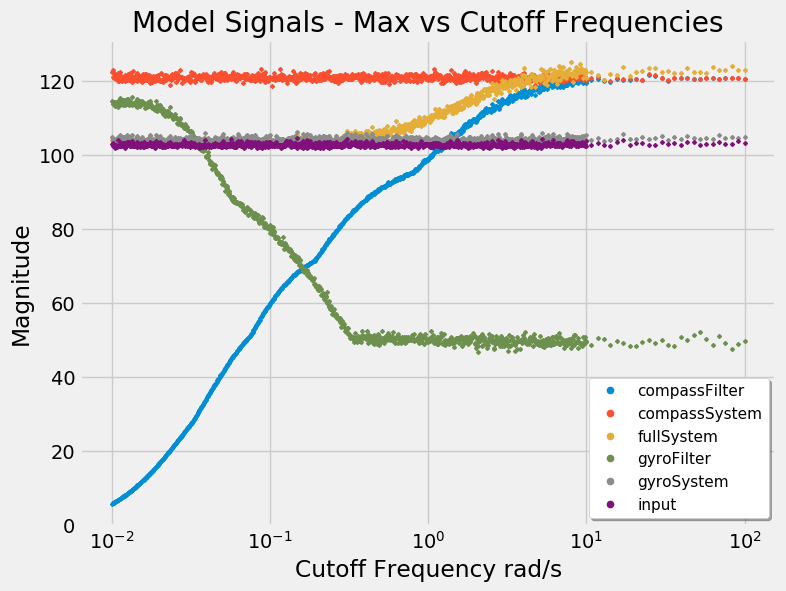

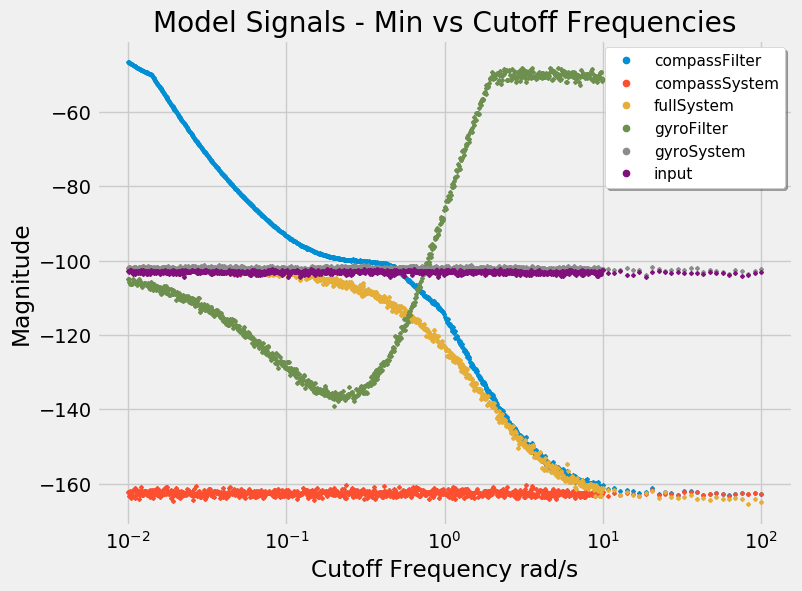

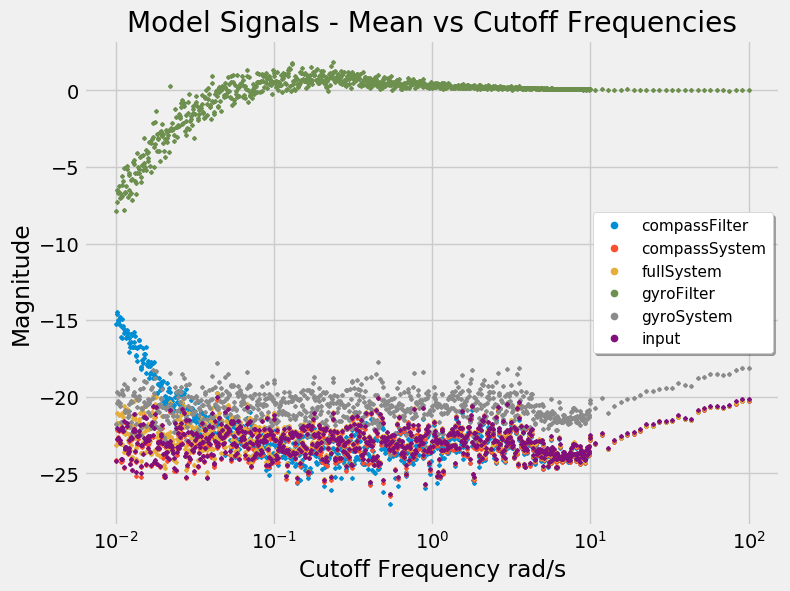

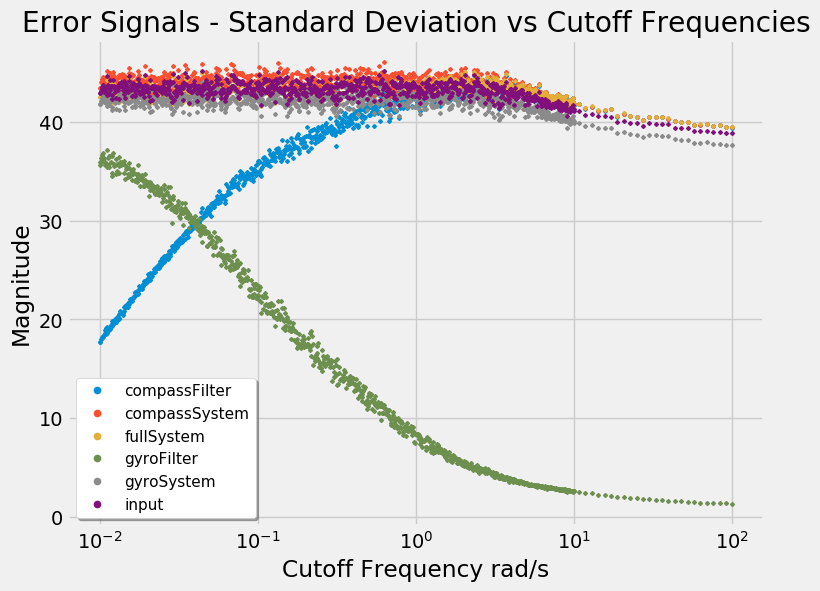

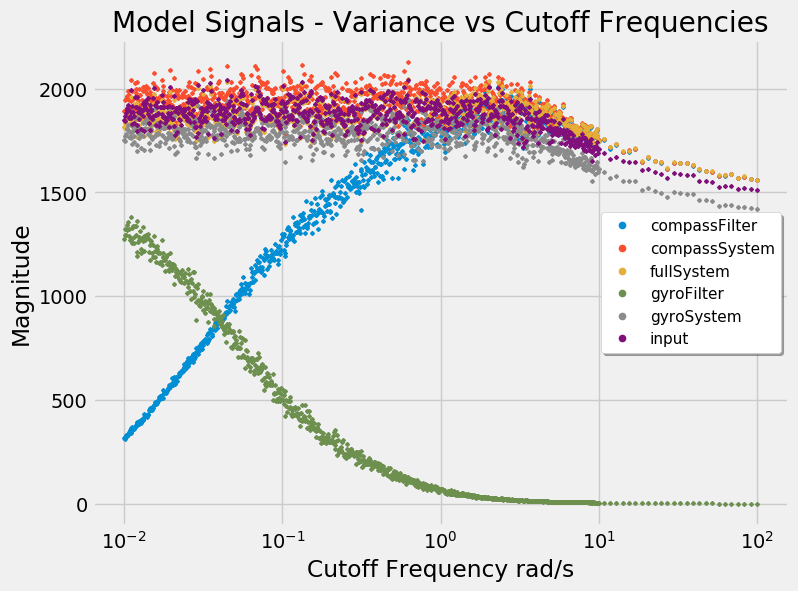

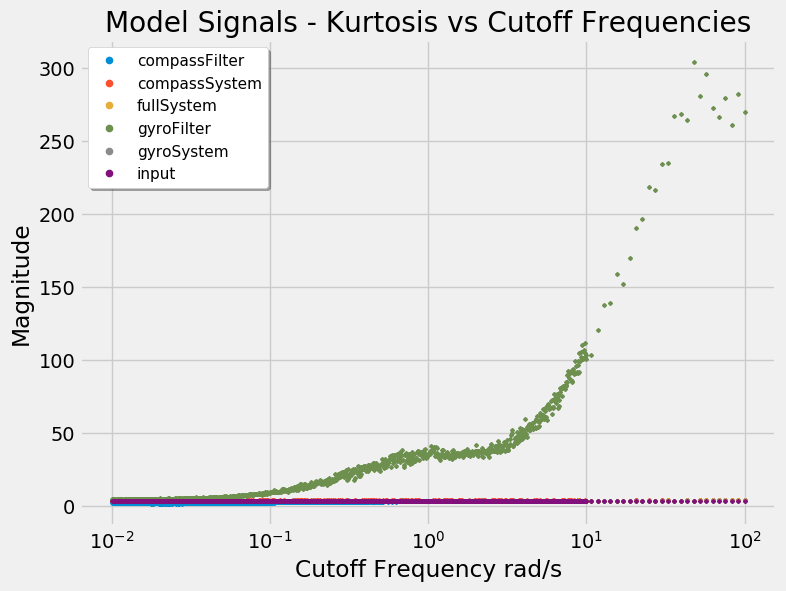

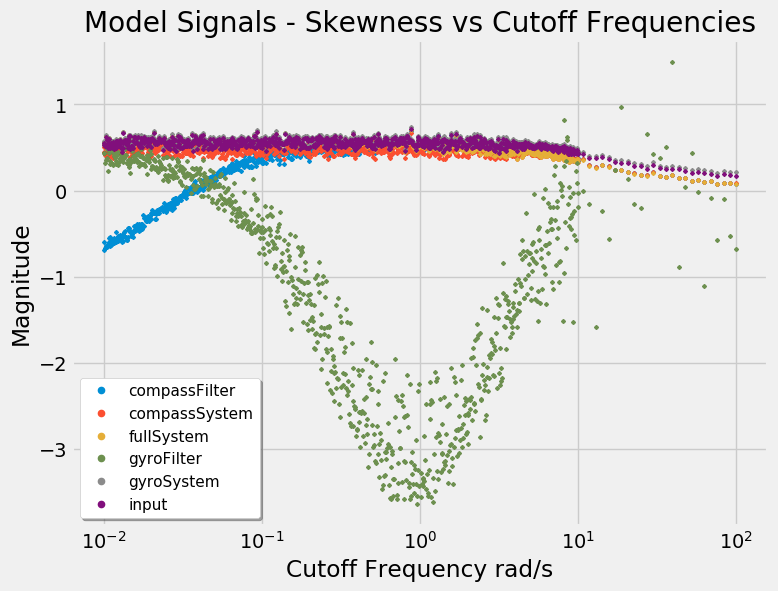

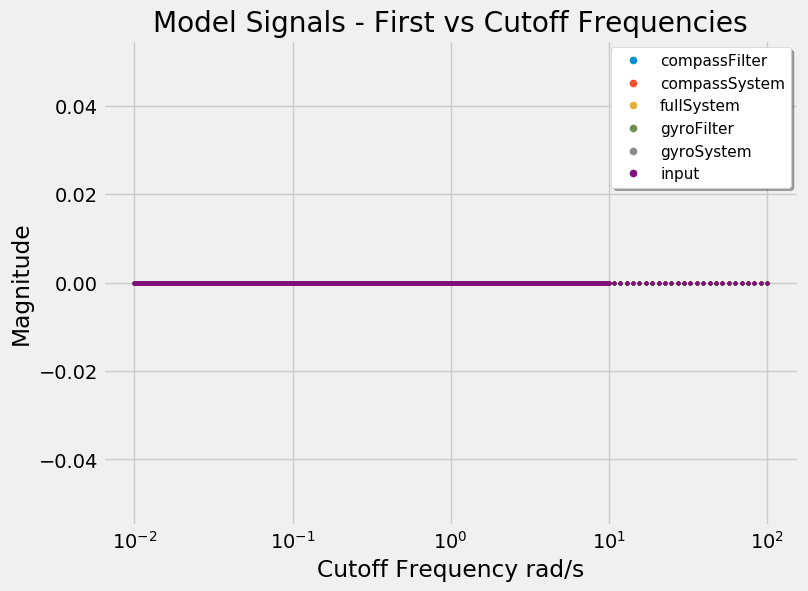

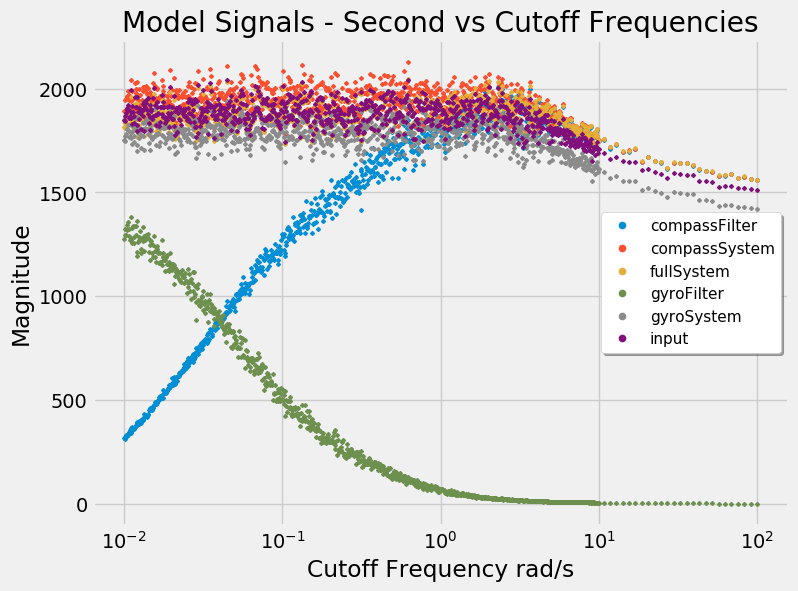

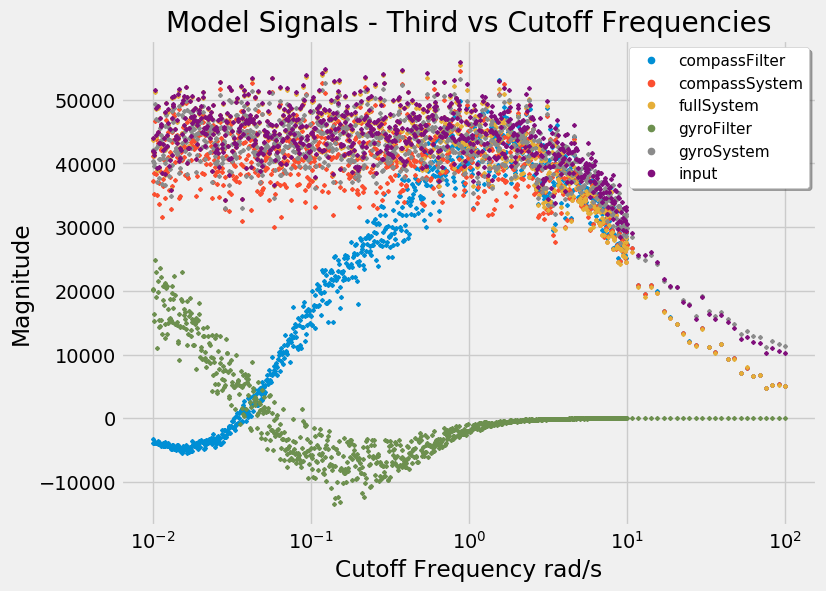

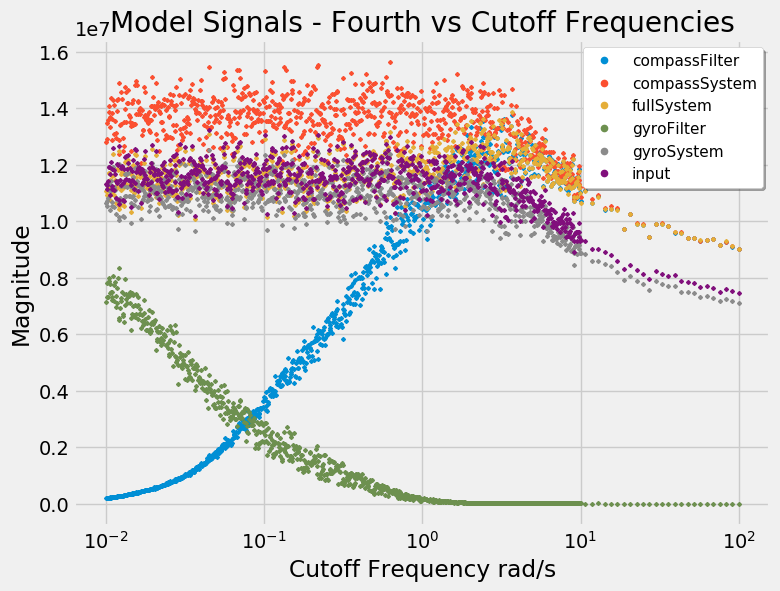

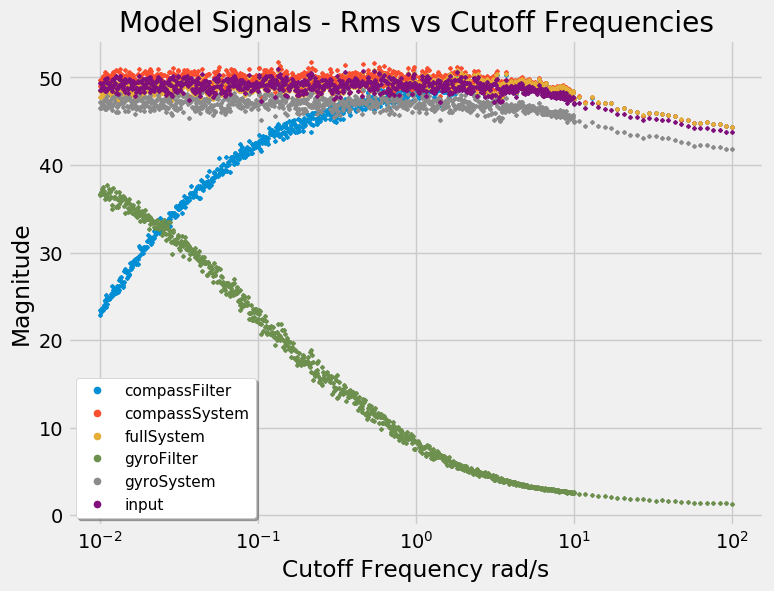

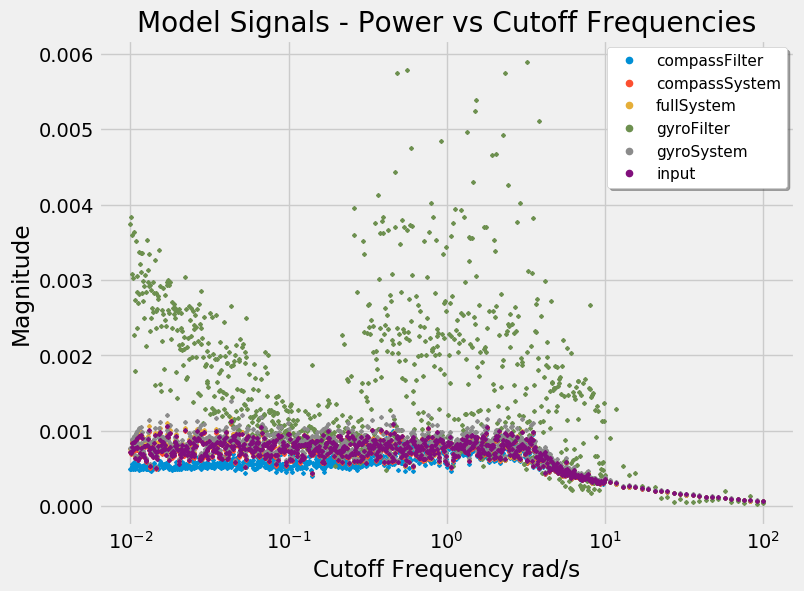

In [25]:
i = 0
# Select all analytic metrics except cutoffFrequency
for analytic_metric in model_signal_data.columns[model_signal_data.columns != "cutoffFrequency"]:
    # Not selecting rows that do not contain correlations
    if analytic_metric.find("Correlation") == -1: 
        # model signals signalsNamesOrdered list
        for model_signal in model_signal_data.index.levels[0]: 
            plt.figure(i, figsize=(8, 6))
            plt.plot(model_signal_data.loc[model_signal, "cutoffFrequency"],
                     model_signal_data.loc[model_signal, analytic_metric],
                     '.',
                     markersize=3,
                     label=model_signal)
            analytic_metric_title_array = re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?=[A-Z]|$)', analytic_metric)
            plt.title("Model Signals - " + analytic_metric_title_array[0].capitalize() + " vs Cutoff Frequencies")
            plt.ylabel(r'Magnitude')
            plt.xlabel('Cutoff Frequency rad/s')
            plt.xscale('log')
        i+=1
        plt.legend(shadow=True,\
                   fancybox=True,\
                   facecolor='white',\
                   framealpha=1,\
                   fontsize=11,
                   markerscale=3.,
                   frameon=True)
        
        if analytic_metric == "standardDeviationSignals":
             plt.title("Error Signals - Standard Deviation vs Cutoff Frequencies")
        
        # Save figures
        plt.savefig("./figures/iterables/model_signals/model" + analytic_metric + ".png", bbox_inches='tight')

### Iterably Generate Statistical Data - Error Signals

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  


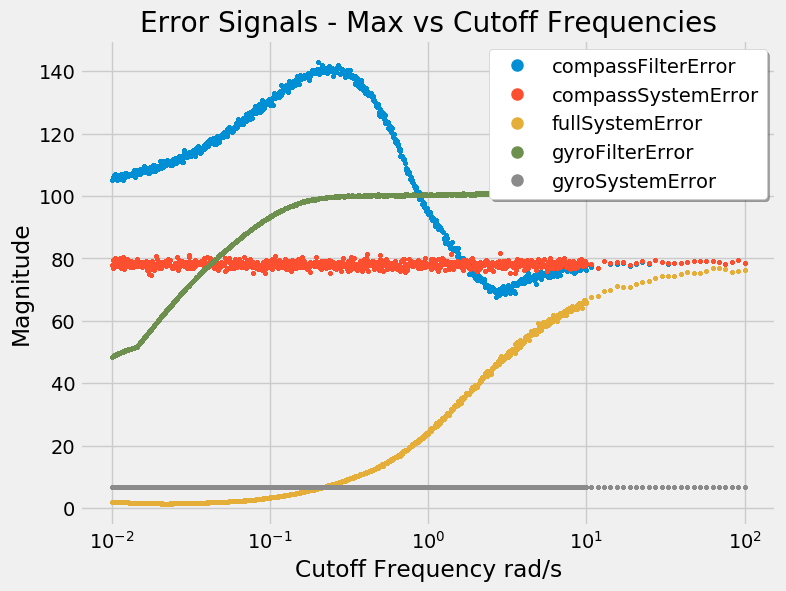

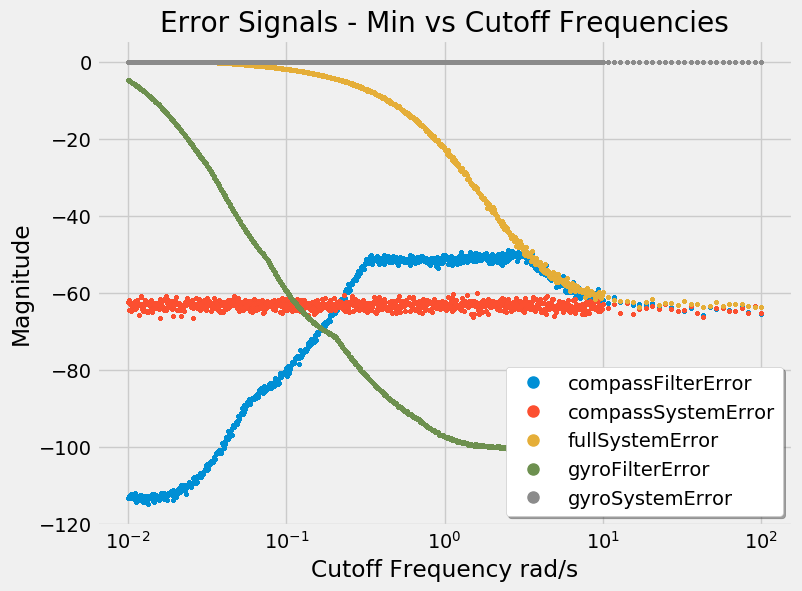

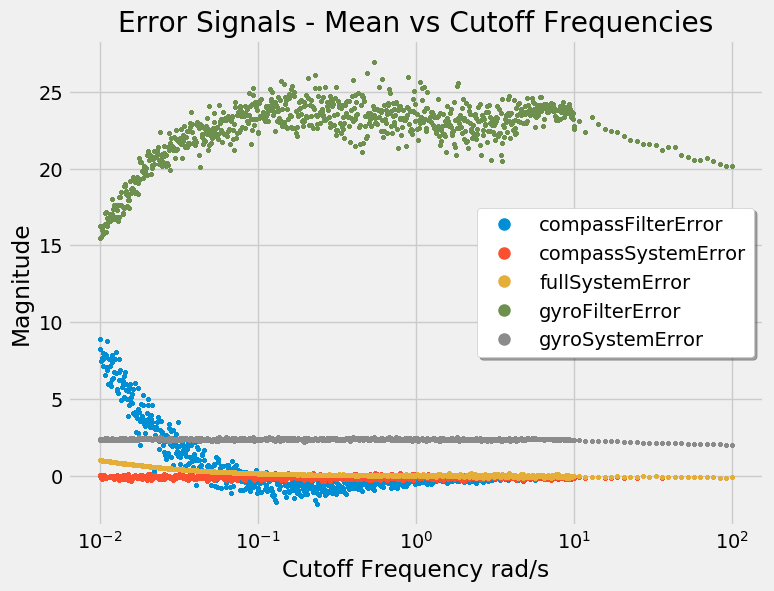

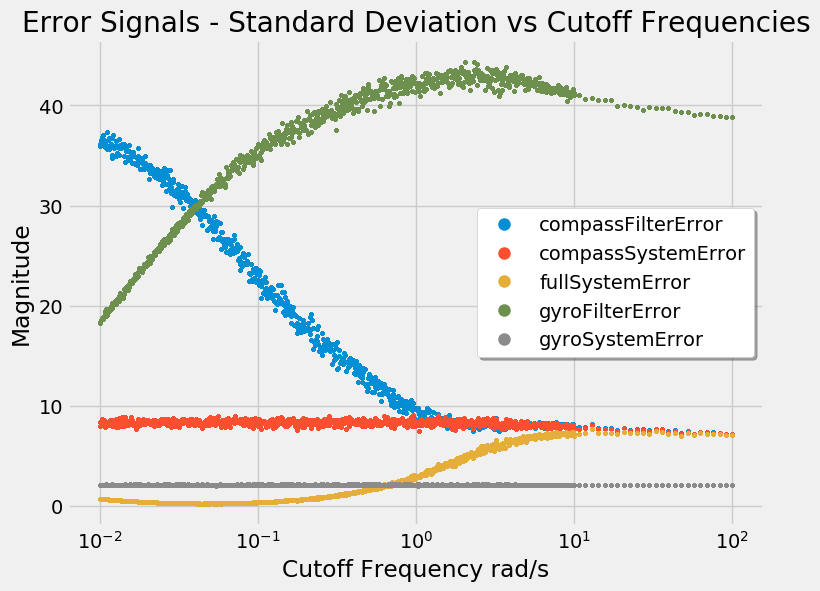

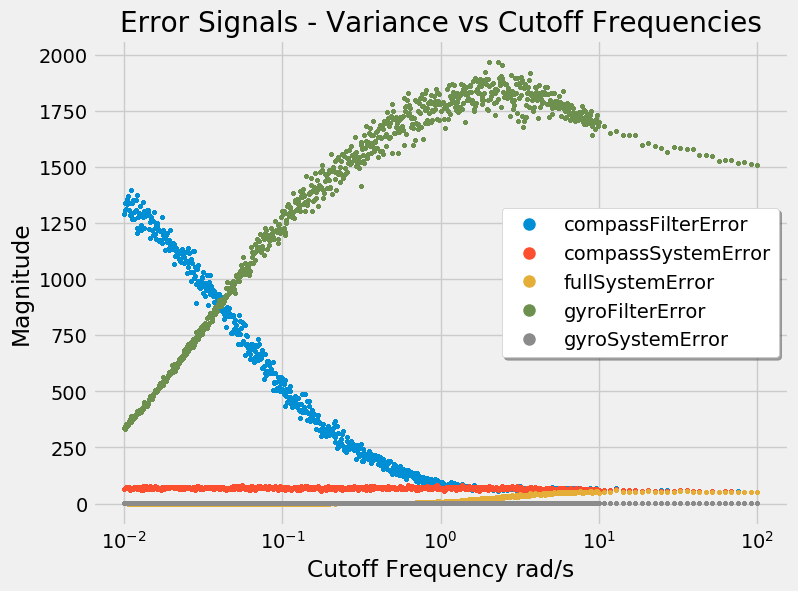

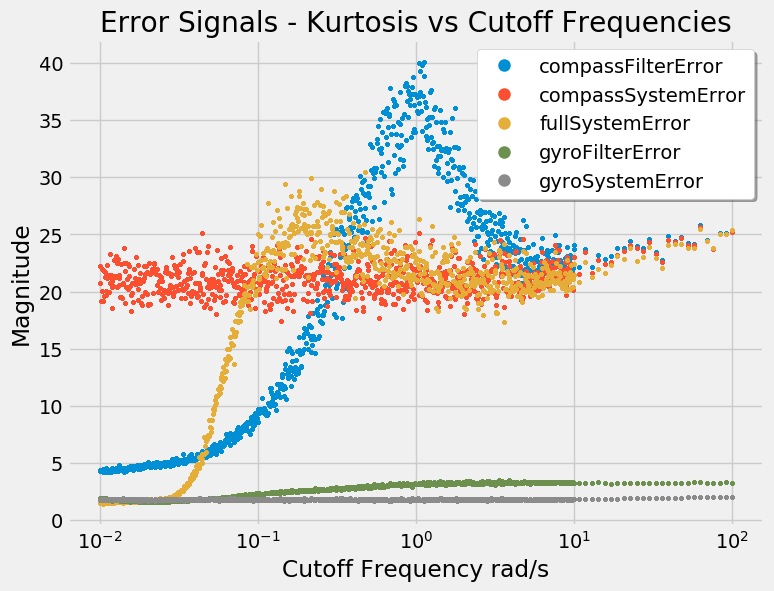

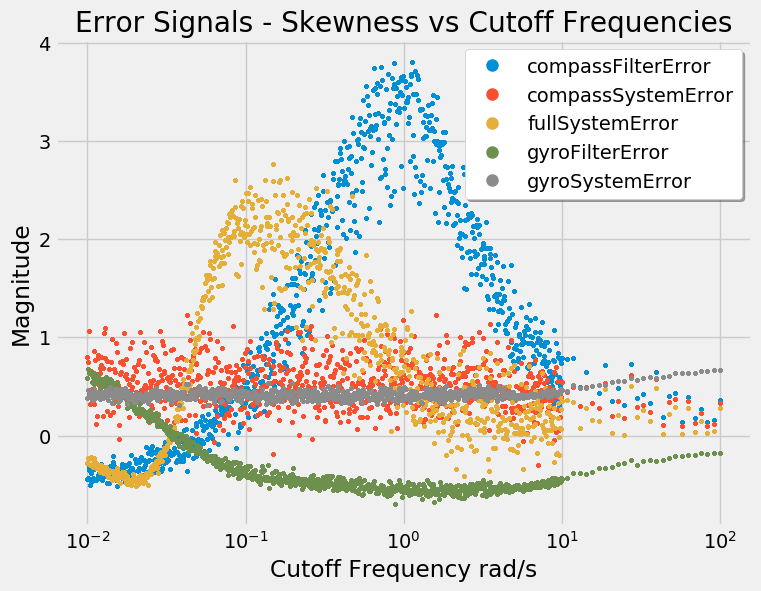

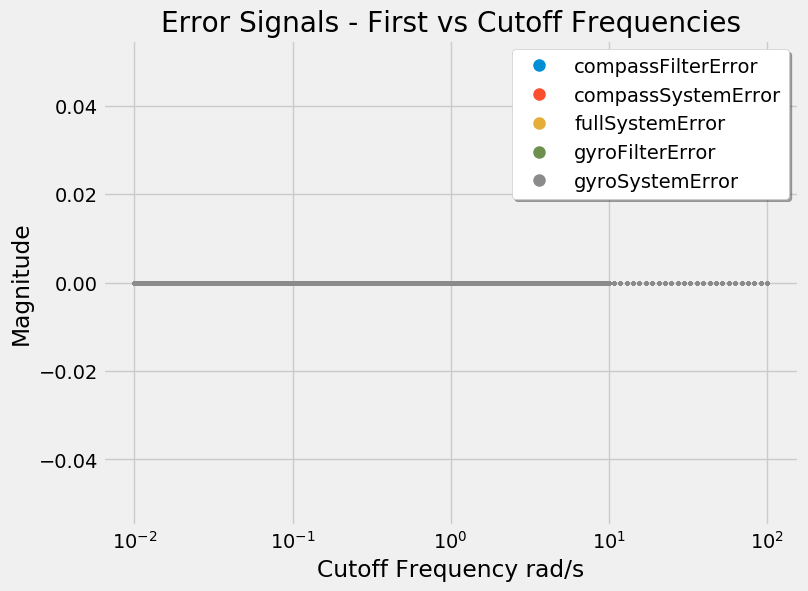

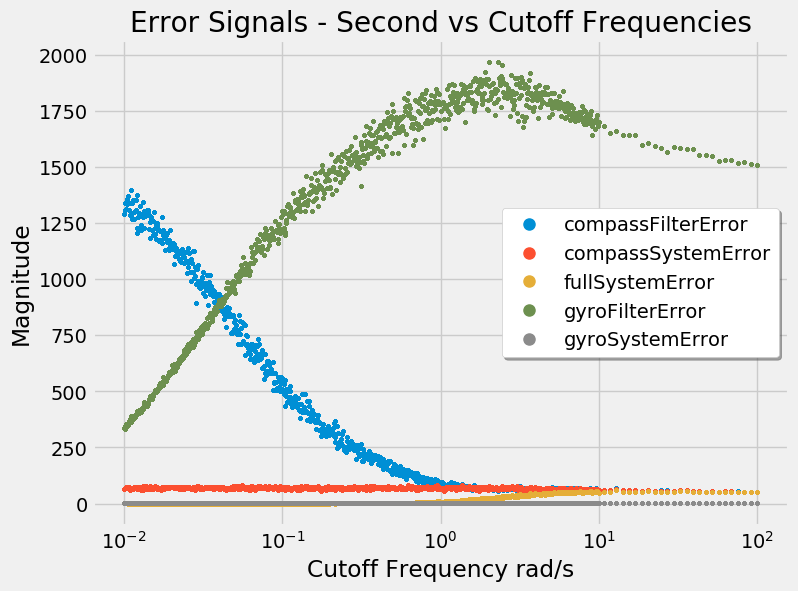

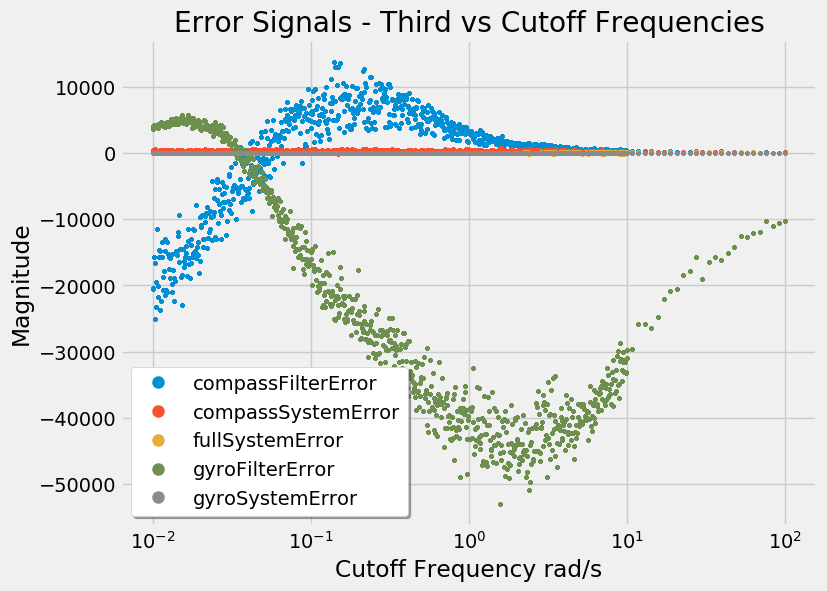

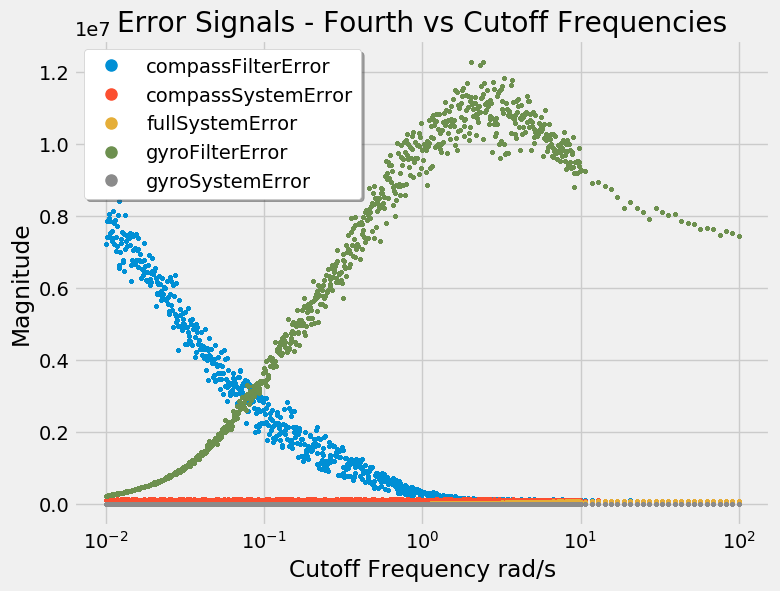

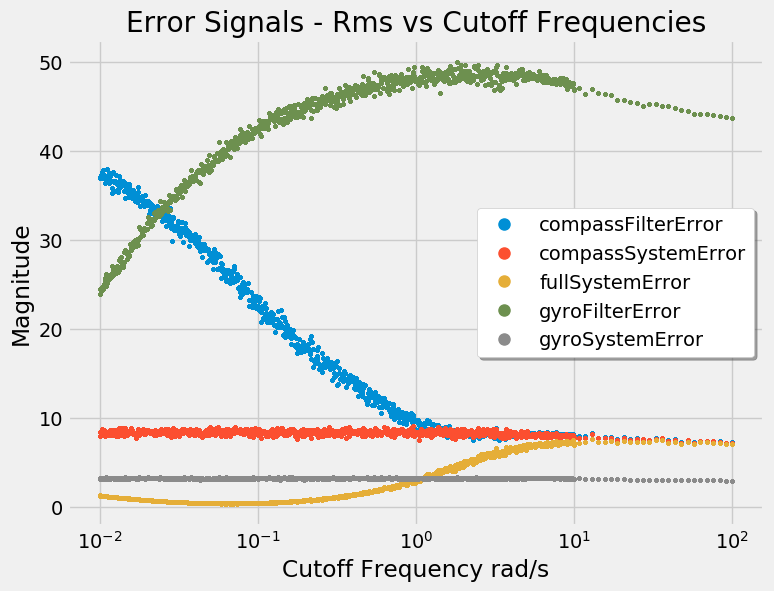

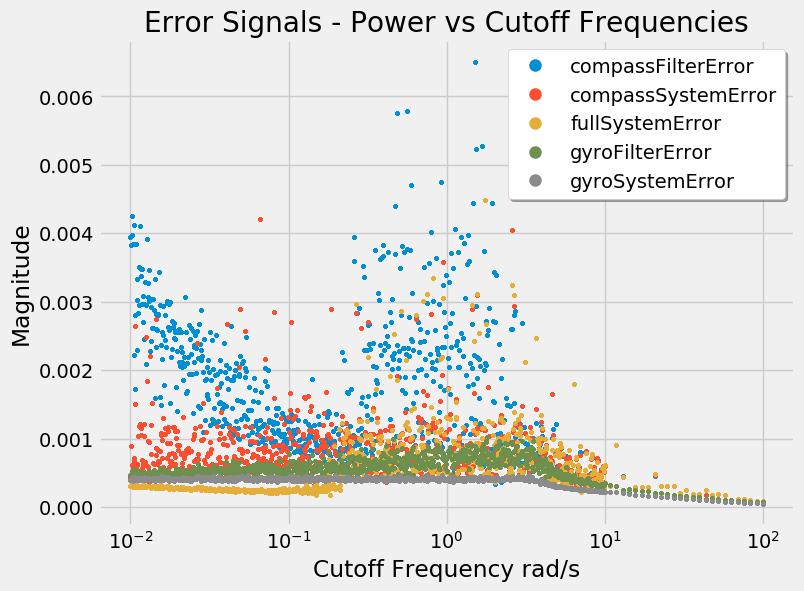

In [26]:
j = 0
for analytic_metric in error_signals_analytic_data.columns[error_signals_analytic_data.columns != "cutoffFrequency"]:
    if analytic_metric.find("Correlation") == -1: # Not selecting rows that do not contain correlations
        # print(analytic_metric)
        for error_signal in error_signals_analytic_data.index.levels[0]: # model signals signalsNamesOrdered list
            plt.figure(j, figsize=(8,6))
            plt.plot(error_signals_analytic_data.loc[error_signal, "cutoffFrequency"],
                     error_signals_analytic_data.loc[error_signal, analytic_metric],
                     '.',
                     markersize=4
                     , label=error_signal)
            analytic_metric_title_array = re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?=[A-Z]|$)', analytic_metric)
            plt.title("Error Signals - " + analytic_metric_title_array[0].capitalize() + " vs Cutoff Frequencies")
            plt.ylabel(r'Magnitude')
            plt.xlabel('Cutoff Frequency rad/s')
            plt.xscale('log')
        j+=1
        plt.legend(shadow=True,\
                   fancybox=True,\
                   facecolor='white',\
                   framealpha=1,\
                   markerscale=4.,
                   frameon=True)
        if analytic_metric == "standardDeviationSignals":
             plt.title("Error Signals - Standard Deviation vs Cutoff Frequencies")
     
    else:
        pass
    plt.savefig("./figures/iterables/error_signals/error" + analytic_metric + ".png", bbox_inches='tight')

### Error Quantification Analysis

Inflection point curve Full System

In [27]:
max_full_model_data_error = full_model_data_analytics_raw[(full_model_data_analytics_raw.signalsNamesOrdered == "fullSystemError")].maxSignals
difference_max = np.diff(max_full_model_data_error)
max_full_model_data_error.iloc[np.where(np.abs(difference_max) < 0.0001)]

877     1.449632
1064    1.427490
2571    2.496154
Name: maxSignals, dtype: float64

FullSystem Mean Signal = 0

In [28]:
min(full_model_data_analytics_raw[(full_model_data_analytics_raw.signalsNamesOrdered == "fullSystemError") &
    (abs(full_model_data_analytics_raw.meanSignals) < 0.1)
].cutoffFrequency)

0.13009

FullSystem Standard Deviation = 0

In [36]:
full_model_data_analytics_raw[(full_model_data_analytics_raw.signalsNamesOrdered == "fullSystemError") &
    (abs(full_model_data_analytics_raw.standardDeviationSignals) < 0.26)
]

signalsNamesOrdered  maxSignals  minSignals  meanSignals  \
1757     fullSystemError    1.701490   -0.252841     0.345562   
1790     fullSystemError    1.717249   -0.293269     0.344294   
1801     fullSystemError    1.767636   -0.293219     0.341337   
1812     fullSystemError    1.744718   -0.288891     0.325840   
1845     fullSystemError    1.769470   -0.326558     0.331279   
1856     fullSystemError    1.769237   -0.339292     0.338095   
1867     fullSystemError    1.802043   -0.356936     0.331168   
1889     fullSystemError    1.814398   -0.367979     0.314606   
1900     fullSystemError    1.803209   -0.371183     0.315098   
1911     fullSystemError    1.797422   -0.376405     0.306262   
1922     fullSystemError    1.799882   -0.402150     0.314162   
1933     fullSystemError    1.834455   -0.403758     0.305732   
1944     fullSystemError    1.829857   -0.424500     0.308522   
1955     fullSystemError    1.843512   -0.416795     0.306355   
1966     fullSystemError    1.851403   -0.438236     0.300193   
1977     fullSystemError    1.850410   -0.430597     0.294942   
1999     fullSystemError    1.879814   -0.463951     0.288293   
2010     fullSystemError    1.864463   -0.455329     0.298953   
2021     fullSystemError    1.916264   -0.507420     0.286817   
2032     fullSystemError    1.907941   -0.513904     0.286389   
2043     fullSystemError    1.906581   -0.513387     0.284112   
2065     fullSystemError    1.931403   -0.544126     0.276187   
2076     fullSystemError    1.939874   -0.552375     0.281700   
2109     fullSystemError    1.976873   -0.601338     0.270584   
2120     fullSystemError    1.979983   -0.599854     0.263444   
2131     fullSystemError    1.991192   -0.616088     0.268656   
2164     fullSystemError    2.027742   -0.668311     0.268710   
2197     fullSystemError    2.036200   -0.664330     0.255373   
2230     fullSystemError    2.081443   -0.728697     0.249026   
2296     fullSystemError    2.112163   -0.787312     0.234613   

      standardDeviationSignals  varianceSignals  kurtosisSignals  \
1757                  0.258707         0.066929         3.738908   
1790                  0.259404         0.067290         4.119337   
1801                  0.256740         0.065915         3.971317   
1812                  0.257056         0.066078         4.072487   
1845                  0.257570         0.066342         4.926767   
1856                  0.256420         0.065751         4.739107   
1867                  0.258496         0.066820         4.538564   
1889                  0.251126         0.063064         4.571955   
1900                  0.250529         0.062765         4.932239   
1911                  0.252898         0.063958         5.436282   
1922                  0.247455         0.061234         4.993544   
1933                  0.253506         0.064265         5.750616   
1944                  0.249448         0.062224         5.021833   
1955                  0.255094         0.065073         5.308308   
1966                  0.254415         0.064727         5.762460   
1977                  0.251464         0.063234         5.805742   
1999                  0.254166         0.064600         6.507922   
2010                  0.252637         0.063825         5.959025   
2021                  0.257012         0.066055         6.874425   
2032                  0.253775         0.064402         7.106936   
2043                  0.258439         0.066791         7.323961   
2065                  0.251974         0.063491         7.377475   
2076                  0.248842         0.061922         7.309382   
2109                  0.256890         0.065992         7.674047   
2120                  0.258205         0.066670         8.020064   
2131                  0.257129         0.066115         8.727754   
2164                  0.256663         0.065876         9.580468   
2197                  0.253227         0.064124        10.498464   
2230             

GyroSystem Mean

In [30]:
np.mean(full_model_data_analytics_raw[(full_model_data_analytics_raw.signalsNamesOrdered == "gyroSystemError")
].meanSignals)

2.3662602835121906

GyroSystem Standard Deviation

In [31]:
np.mean(full_model_data_analytics_raw[(full_model_data_analytics_raw.signalsNamesOrdered == "gyroSystemError")
].standardDeviationSignals)

2.1306361097128708

Compass Filter Time response table

## Analytics for all signals


So how will we determine the error from each signal accordingly? Let's assume it's propotional. We know the cutoff frequency determines how much of the compass dominates the response, and because its complementary, this also means how much of the gyro is not present in the response. So we want to know what is the error proportionality. We could in theory see the frequency response of the signals that we have, and compare as that changes. Do we have to create our own fast fourier transform response? Let's do it to see what happens.

How do we determine the error proportionality. We can consider a simple step signal case.

See [these references for plot_surface](https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib) and [this](https://stackoverflow.com/questions/36589521/how-to-surface-plot-3d-plot-from-dataframe).

It would be inaccurate to linearly substract the value between the error and the 

We can model small UAV data of https://ieeexplore.ieee.org/abstract/document/6095129 and [A minimalist control strategy for small UAVs](https://ieeexplore.ieee.org/abstract/document/5354465), [Understanding Autonomous Drone Maneuverability
for Internet of Things Applications](https://research.csiro.au/ng/wp-content/uploads/sites/106/2016/08/Understanding-Autonomous-cameraready-2017.pdf). Here's the [Phantom 2 datasheet Max Angular Speed	150°/s](https://www.dji.com/uk/phantom-3-pro/info). [Mavic 2 pro Max Angular Velocity	200°/s](https://www.dji.com/uk/mavic-2/info#specs).